# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari sumber public repositories yaitu [Kaggle](https://www.kaggle.com/datasets/azizp123/simnangkis-eksport-mlati)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak memiliki label atau kelas.
   - **Jumlah Baris**: Memiliki 23567 baris dan terdiri dari 44 atribut yang pastinya dataset ini cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, id_hub_rumah_tangga, id_nikah, id_difable, id_penyakit_kronis, dll.
     - *Numerikal*: Misalnya usia, jmlh_anggota_keluarga, luas_lantai, jumlah_kamar, dll.

3. **Tentang Dataset**:  
   Dataset ini merupakan kumpulan data yang berisi informasi mengenai kondisi sosial ekonomi warga di Kecamatan Mlati, Kabupaten Sleman tahun 2023. Dataset ini diperoleh dari SIMNANGKIS (Sistem Informasi Manajemen Penanggulangan Kemiskinan) Dinas Sosial Kabupaten Sleman pada bulan Juli 2023 dengan tujuan untuk memetakan kondisi kemiskinan dan kesejahteraan warga di wilayah tersebut.Dataset ini memiliki total 23567 baris dan terdiri dari 44 atribut yang mencakup berbagai aspek rumah tangga dan individu. Atribut-atribut dalam dataset ini mencakup data demografis, kondisi hunian, tingkat pendidikan, kondisi kesehatan, status pekerjaan, dan kepemilikan aset

4. **Tujuan Membuat Model**
   Tujuan utama dari pembuatan model clustering ini adalah untuk mengelompokkan keluarga berdasarkan kondisi sosial ekonomi mereka ke dalam kategori kebutuhan bantuan sosial. Dalam konteks ini, pendekatan unsupervised learning melalui metode clustering digunakan karena tidak terdapat label atau kelas dalam dataset awal.
      
   Secara umum, target kategorisasi yang ingin dicapai adalah sebagai berikut: 
      - Sangat Membutuhkan Bantuan
      - Membutuhkan Bantuan
      - Belum Membutuhkan Bantuan

   Namun demikian, jumlah kelompok (cluster) akhir dapat berubah secara dinamis berdasarkan hasil evaluasi dari metode penentuan jumlah cluster optimal, seperti metode Elbow atau Silhouette Score. Hal ini dimaksudkan untuk memastikan bahwa pembagian kelompok benar-benar mencerminkan struktur alami dalam data, dan tidak semata-mata dipaksakan sesuai keinginan awal.

   Hasil clustering ini nantinya akan digunakan sebagai label untuk proses supervised learning (klasifikasi), dengan harapan dapat membangun sebuah model machine learning yang mampu memprediksi tingkat kebutuhan bantuan sosial keluarga berdasarkan karakteristik sosial-ekonomi mereka.

# **2. Import Library**

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

In [101]:
df = pd.read_csv('simnangkis_eksport_mlati.csv')
df.head()

,status,id_kelamin,kelurahan,id_hub_rumah_tangga,id_hub_keluarga,usia,id_nikah,id_difable,id_penyakit_kronis,id_partisipasi_sekolah,...,ada_sepeda,ada_motor,ada_mobil,ada_perahu,ada_motor_tempel,ada_perahu_motor,ada_kapal,aset_tak_bergerak,rumah_lain,sta_art_usaha
0,miskin,Perempuan,Sendangadi,Anak,3.0,20.0,Belum kawin,Tidak cacat,Tidak Memiliki Penyakit Kronis,Tidak bersekolah lagi,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
1,miskin,Perempuan,Sendangadi,Anak,3.0,22.0,Belum kawin,Tidak cacat,Tidak Memiliki Penyakit Kronis,Tidak bersekolah lagi,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
2,miskin,Perempuan,Sendangadi,Kepala rumah tangga,1.0,41.0,Cerai hidup,Tidak cacat,Tidak Memiliki Penyakit Kronis,Tidak bersekolah lagi,...,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
3,miskin,Laki-laki,Sendangadi,Anak,3.0,40.0,Belum kawin,Tidak cacat,Tidak Memiliki Penyakit Kronis,Tidak bersekolah lagi,...,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
4,miskin,Perempuan,Sendangadi,Istri/suami,2.0,67.0,Kawin/nikah,Tidak cacat,Tidak Memiliki Penyakit Kronis,Tidak bersekolah lagi,...,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Tidak,Ya,Tidak,Tidak


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23567 entries, 0 to 23566
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  23567 non-null  object 
 1   id_kelamin              23567 non-null  object 
 2   kelurahan               23567 non-null  object 
 3   id_hub_rumah_tangga     23567 non-null  object 
 4   id_hub_keluarga         23567 non-null  float64
 5   usia                    23567 non-null  float64
 6   id_nikah                23567 non-null  object 
 7   id_difable              23567 non-null  object 
 8   id_penyakit_kronis      23567 non-null  object 
 9   id_partisipasi_sekolah  23567 non-null  object 
 10  jml_anggota_keluarga    23567 non-null  int64  
 11  sta_bangunan            23567 non-null  object 
 12  sta_lahan               23567 non-null  object 
 13  luas_lantai             23567 non-null  float64
 14  lantai                  23567 non-null

In [103]:
df.describe()

,id_hub_keluarga,usia,jml_anggota_keluarga,luas_lantai,lantai,dinding,atap,jumlah_kamar,sumber_air_minum,daya,bb_masak,kloset,buang_tinja
count,23567.000000,23567.000000,23567.000000,23567.000000,23567.00000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000
mean,2.070565,37.209488,3.330123,492.653414,4.21441,1.017864,4.016124,2.229898,5.829168,1.740612,4.140960,1.192388,1.645394
std,1.036212,19.381985,1.269834,474.155231,2.07270,0.183495,0.423663,0.883679,1.015124,1.377450,2.159943,0.652316,0.943124
min,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,20.000000,2.000000,90.000000,2.00000,1.000000,4.000000,2.000000,6.000000,1.000000,3.000000,1.000000,1.000000
50%,2.000000,38.000000,3.000000,470.000000,4.00000,1.000000,4.000000,2.000000,6.000000,1.000000,3.000000,1.000000,1.000000
75%,3.000000,52.000000,4.000000,700.000000,6.00000,1.000000,4.000000,3.000000,6.000000,2.000000,3.000000,1.000000,2.000000
max,8.000000,100.000000,15.000000,6060.000000,10.00000,7.000000,10.000000,22.000000,12.000000,6.000000,9.000000,4.000000,6.000000


In [104]:
print("\nJumlah nilai yang hilang per kolom:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Jumlah nilai yang hilang per kolom:
Series([], dtype: int64)


Dari data kita ini, tidak ada missing value

In [105]:
duplicates = df[df.duplicated()]

print(duplicates)

Empty DataFrame
Columns: [status, id_kelamin, kelurahan, id_hub_rumah_tangga, id_hub_keluarga, usia, id_nikah, id_difable, id_penyakit_kronis, id_partisipasi_sekolah, jml_anggota_keluarga, sta_bangunan, sta_lahan, luas_lantai, lantai, dinding, kondisi_dinding, atap, kondisi_atap, jumlah_kamar, sumber_air_minum, cara_peroleh_air_minum, sumber_penerangan, daya, bb_masak, fas_bab, kloset, buang_tinja, ada_tabung_gas, ada_lemari_es, ada_ac, ada_pemanas, ada_telepon, ada_tv, ada_emas, ada_laptop, ada_sepeda, ada_motor, ada_mobil, ada_perahu, ada_motor_tempel, ada_perahu_motor, ada_kapal, aset_tak_bergerak, rumah_lain, sta_art_usaha]
Index: []

[0 rows x 46 columns]


Tidak ada data duplikat juga

In [106]:
# Ambil semua kolom numerik
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Statistik deskriptif
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id_hub_keluarga,23567.0,2.070565,1.036212,1.0,1.0,2.0,3.0,8.0
usia,23567.0,37.209488,19.381985,0.0,20.0,38.0,52.0,100.0
jml_anggota_keluarga,23567.0,3.330123,1.269834,1.0,2.0,3.0,4.0,15.0
luas_lantai,23567.0,492.653414,474.155231,0.0,90.0,470.0,700.0,6060.0
lantai,23567.0,4.214410,2.072700,1.0,2.0,4.0,6.0,10.0
dinding,23567.0,1.017864,0.183495,1.0,1.0,1.0,1.0,7.0
atap,23567.0,4.016124,0.423663,1.0,4.0,4.0,4.0,10.0
jumlah_kamar,23567.0,2.229898,0.883679,0.0,2.0,2.0,3.0,22.0
sumber_air_minum,23567.0,5.829168,1.015124,1.0,6.0,6.0,6.0,12.0
daya,23567.0,1.740612,1.377450,1.0,1.0,1.0,2.0,6.0


Kita lihat dari hasil code deskripsi diatas kita mendatpkan beberap isight singkat sebagai beriku :
- Usia: Rata-rata 37 tahun, rentang 0-100, median 38, menunjukkan populasi merata dari anak hingga lansia.
- Jumlah Anggota Keluarga: Rata-rata 3.3 orang, median 3, maksimum 15, mengindikasikan kebanyakan keluarga kecil hingga sedang.
- Luas Lantai: Rata-rata 492 m², median 470 m², tapi ada nilai ekstrem (6060 m²) dan minimum 0, menunjukkan variasi besar. (Mungkin ada outlier)
- Jumlah Kamar: Rata-rata 2.2, median 2, maksimum 22, mayoritas rumah kecil tapi ada outlier.
- Daya Listrik: Rata-rata 1.74 (mungkin 450-900 watt), median 1, menunjukkan mayoritas keluarga dengan daya rendah.
- Sumber Air Minum: Rata-rata 5.8, median 6, menunjukkan ketergantungan pada satu jenis sumber dominan.
- Bahan Bakar Masak: Rata-rata 4.1, median 3, mayoritas menggunakan bahan bakar tertentu (mungkin gas).
- Sanitasi (Kloset & Buang Tinja): Rata-rata ~1.2-1.6, median 1, menunjukkan fasilitas dasar dominan.

Untuk melihat outlier mari kita visualisaikan data numerik ke dalam bentuk Boxplot


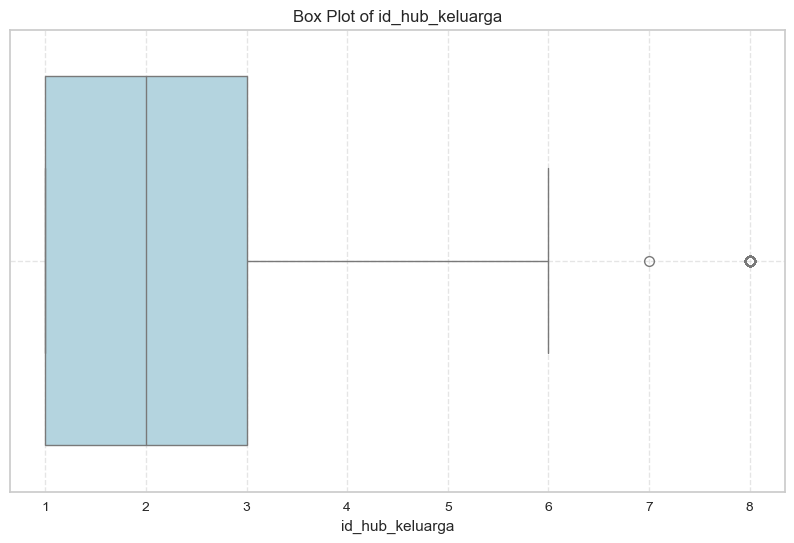

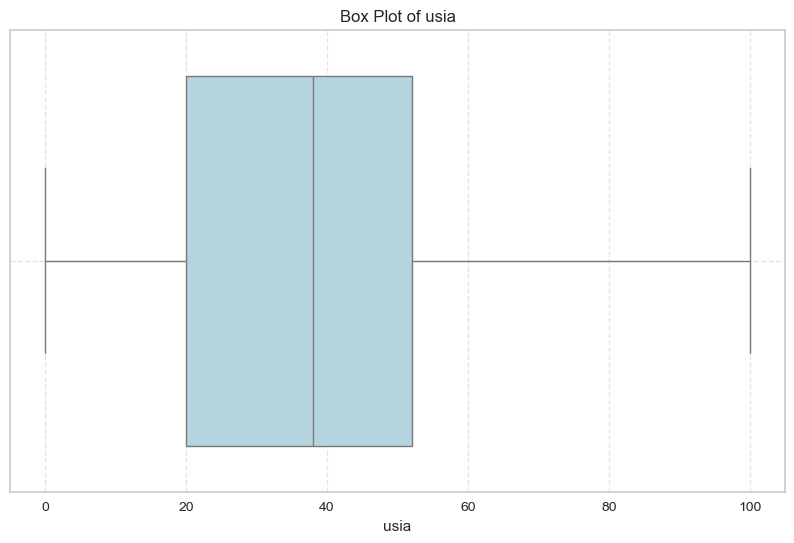

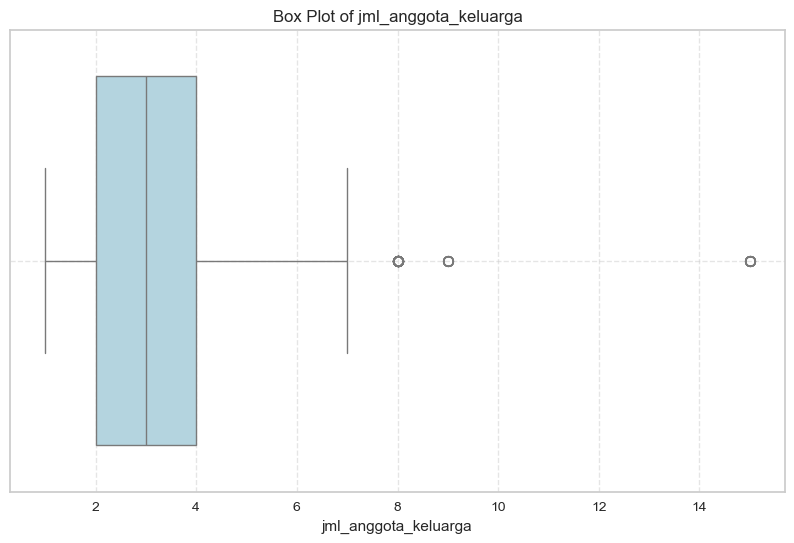

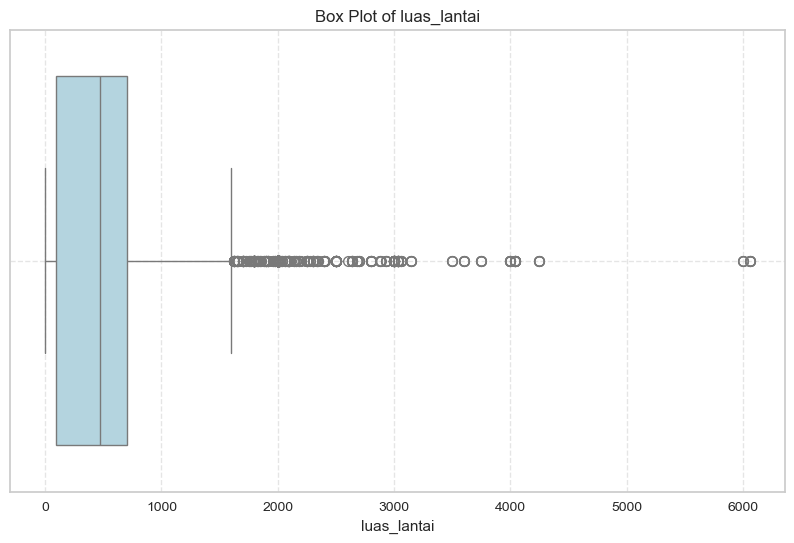

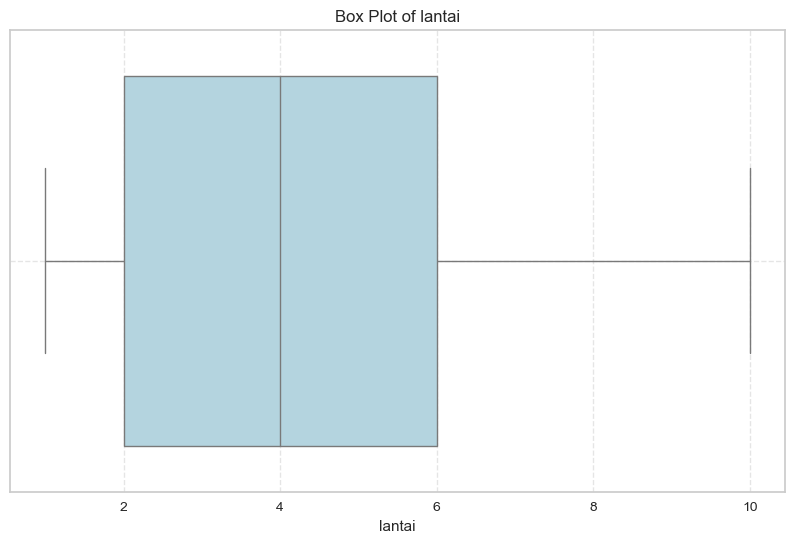

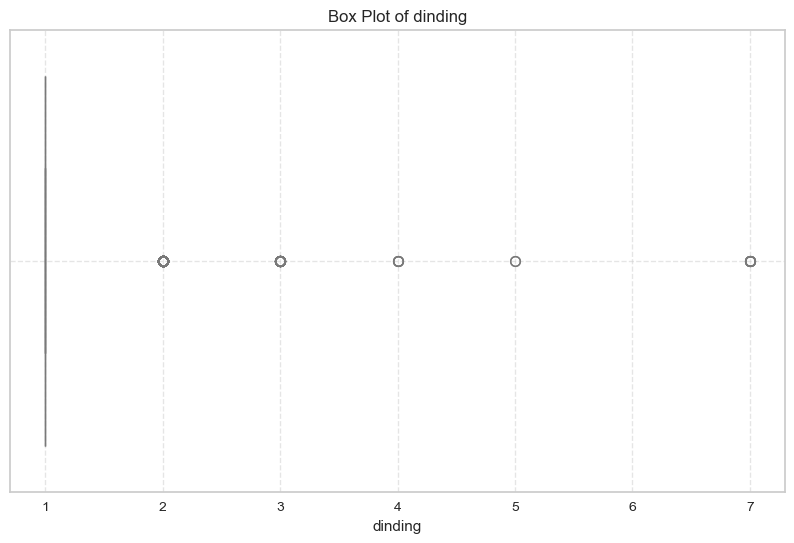

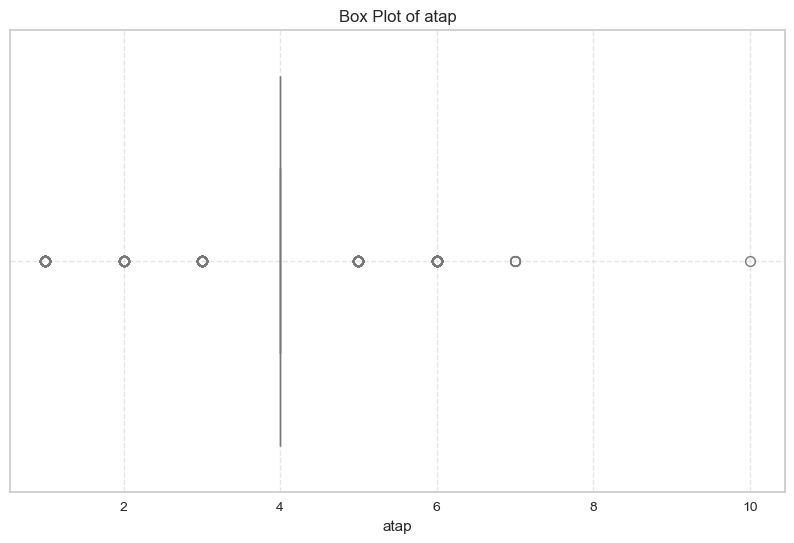

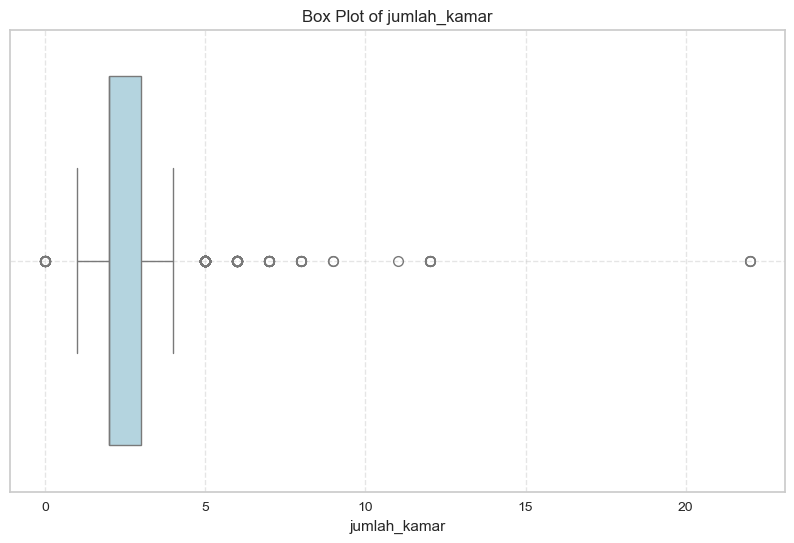

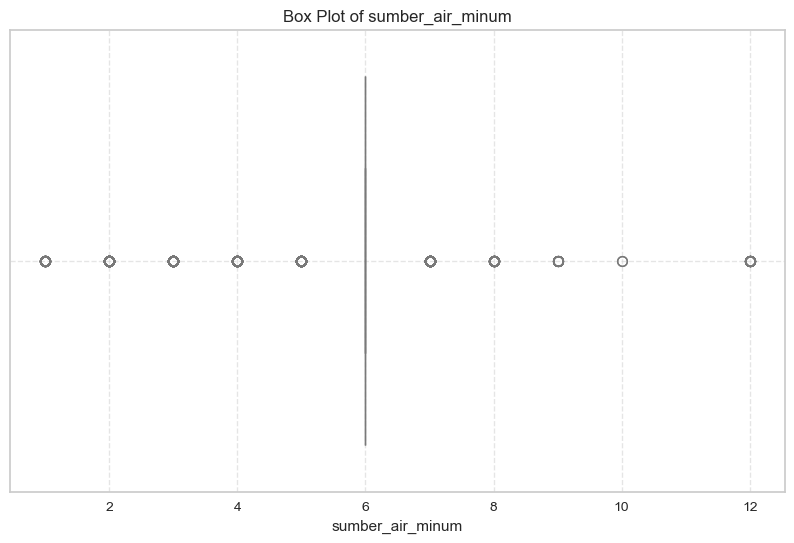

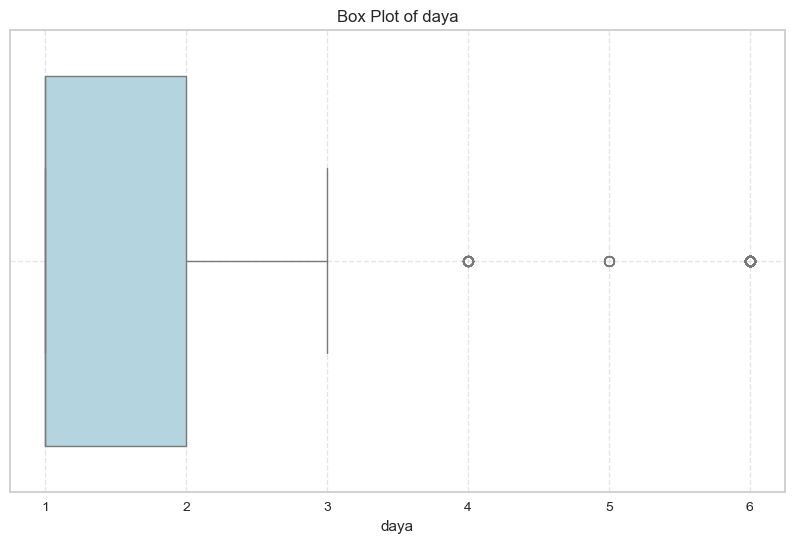

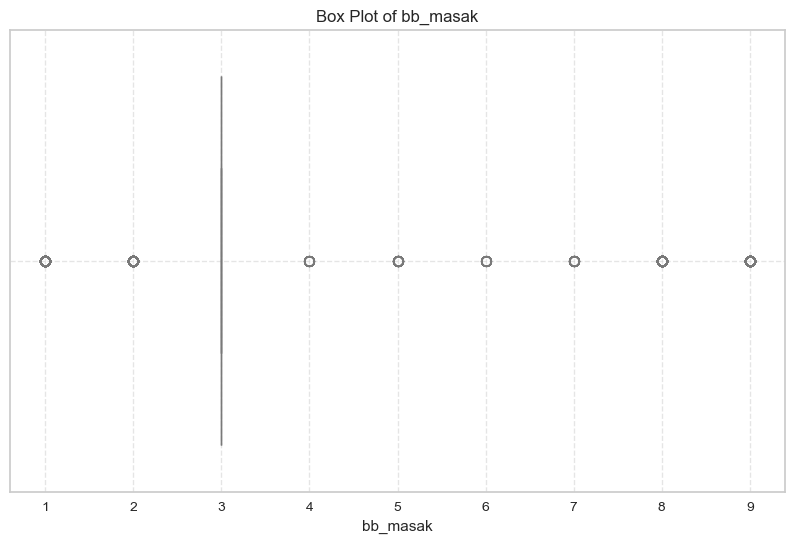

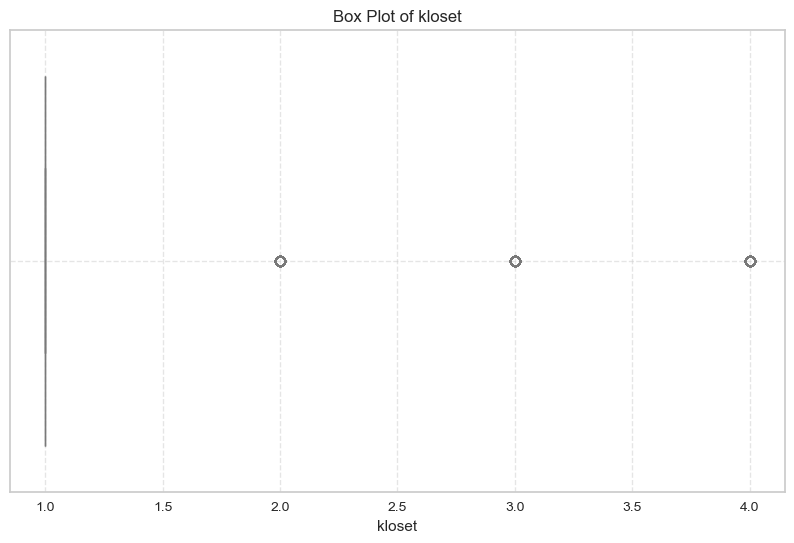

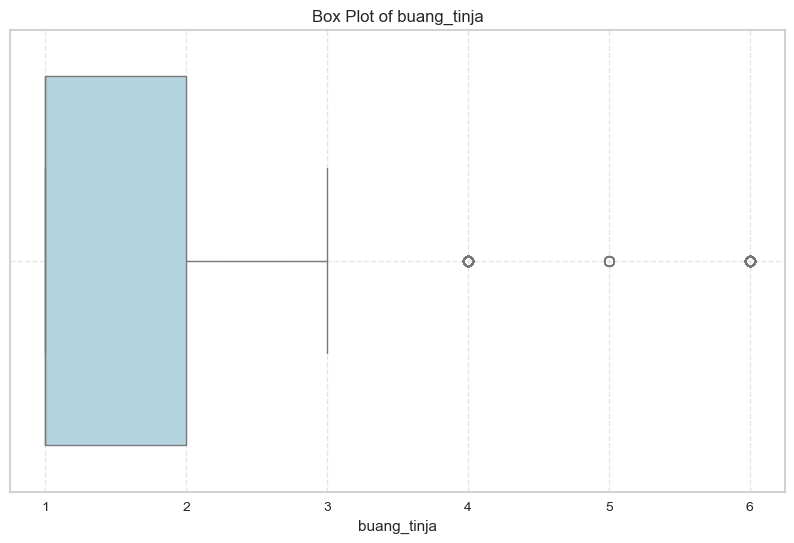

In [107]:
# Loop satu per satu dan tampilkan boxplot
for feature in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature], color='lightblue')
    plt.title(f'Box Plot of {feature}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


Sangat banyak fitur numerik ini, namun nanti kita hanya memilih beberapa fitur saja berdasarkan fiture selection kita nanti.

Namun kita lihat disini beberapa colomn memeiliki data outlier seperti pada kolom luas lantai, namun nanti kita akan selesaikan.

Sekarang mari kita lihat korelasi setiap variable


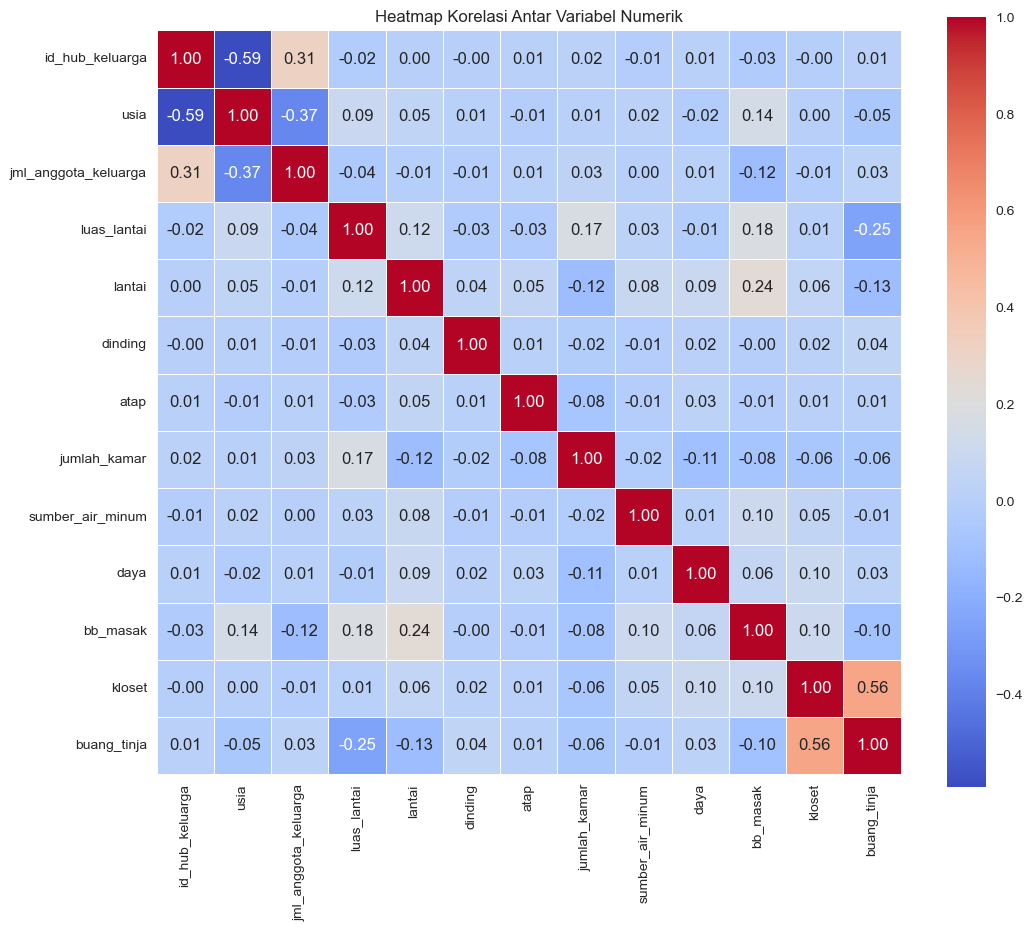

In [108]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_columns].corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

In [109]:
print("Matriks Korelasi:")
print(correlation_matrix.round(2))  

Matriks Korelasi:
                      id_hub_keluarga  usia  jml_anggota_keluarga  \
id_hub_keluarga                  1.00 -0.59                  0.31   
usia                            -0.59  1.00                 -0.37   
jml_anggota_keluarga             0.31 -0.37                  1.00   
luas_lantai                     -0.02  0.09                 -0.04   
lantai                           0.00  0.05                 -0.01   
dinding                         -0.00  0.01                 -0.01   
atap                             0.01 -0.01                  0.01   
jumlah_kamar                     0.02  0.01                  0.03   
sumber_air_minum                -0.01  0.02                  0.00   
daya                             0.01 -0.02                  0.01   
bb_masak                        -0.03  0.14                 -0.12   
kloset                          -0.00  0.00                 -0.01   
buang_tinja                      0.01 -0.05                  0.03   

               

Dataset ini menunjukkan populasi dengan usia rata-rata 37 tahun dan keluarga kecil (3.3 anggota), namun variasi luas lantai (0-6060 m²) dan jumlah kamar (0-22) mengindikasikan ketimpangan kondisi hunian. Mayoritas rumah memiliki fasilitas dasar seperti dinding tembok, atap genteng, daya listrik rendah (450 watt), dan sanitasi standar, dengan ketergantungan pada sumber air dan bahan bakar tertentu. Korelasi menonjolkan hubungan negatif kuat antara usia dan status keluarga (-0.59), serta keterkaitan fasilitas hunian seperti luas lantai dengan sanitasi (-0.25) dan bahan bakar (0.18), sementara sanitasi (kloset dan buang tinja) berkorelasi kuat (0.56), menunjukkan faktor kesejahteraan saling terkait meskipun banyak variabel independen.

Dan untuk Lebih dalam lagi mari kita lihat distribusi data numerikalnya menggunakan histogram yang menunjukkan nilai-nilai dalam fitur tersebut. Histogram ini dilengkapi dengan kurva densitas untuk memberikan gambaran lebih jelas tentang pola distribusi data: apakah data terdistribusi normal atau mengalami skewness?

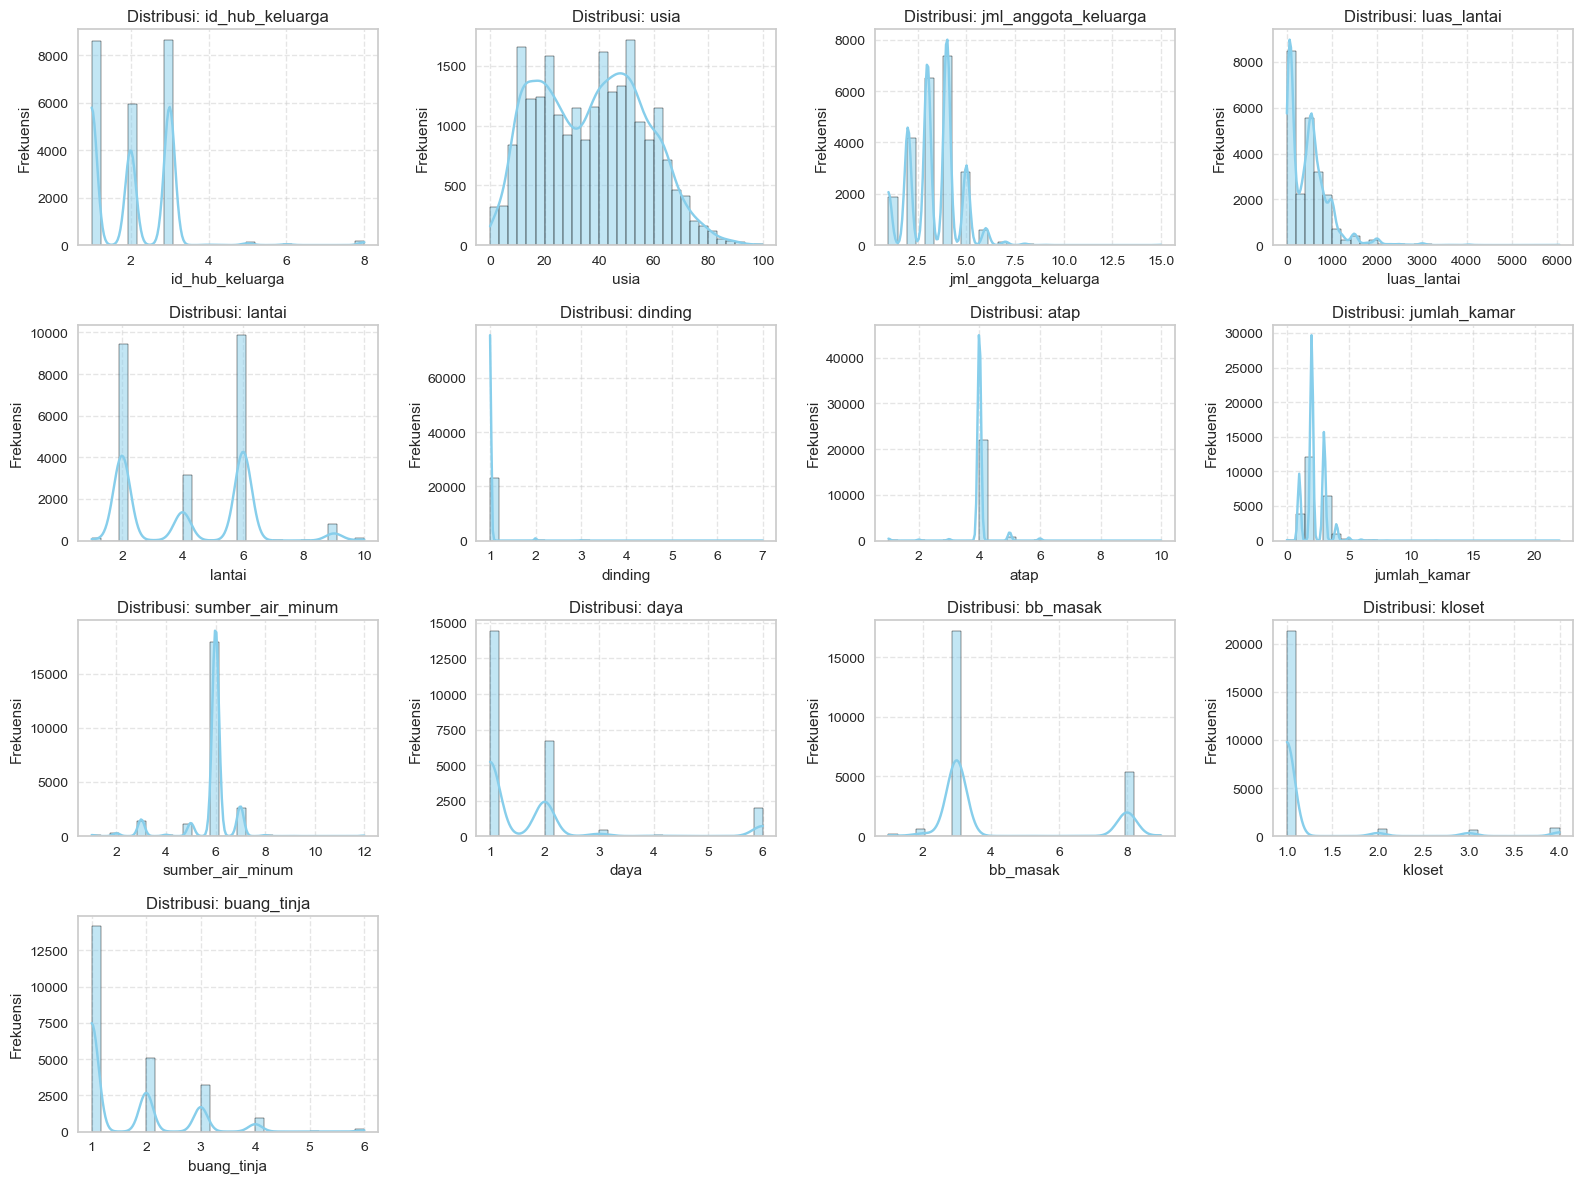

In [110]:
# Visualisasi distribusi dengan histogram + KDE
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) // 4 + 1), 4, i) 
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi: {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frekuensi")
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Kita bisa melihat disini sebaran nilai pada setiap data berbeda, nanti di part selanjutnya kita akan scaling atau normalisasi (standarisasi)
Standardisasi penting untuk memastikan bahwa semua fitur dalam dataset memiliki skala yang sama sehingga mempermudah model untuk belajar dengan lebih baik dan memberikan hasil yang lebih akurat serta stabil.

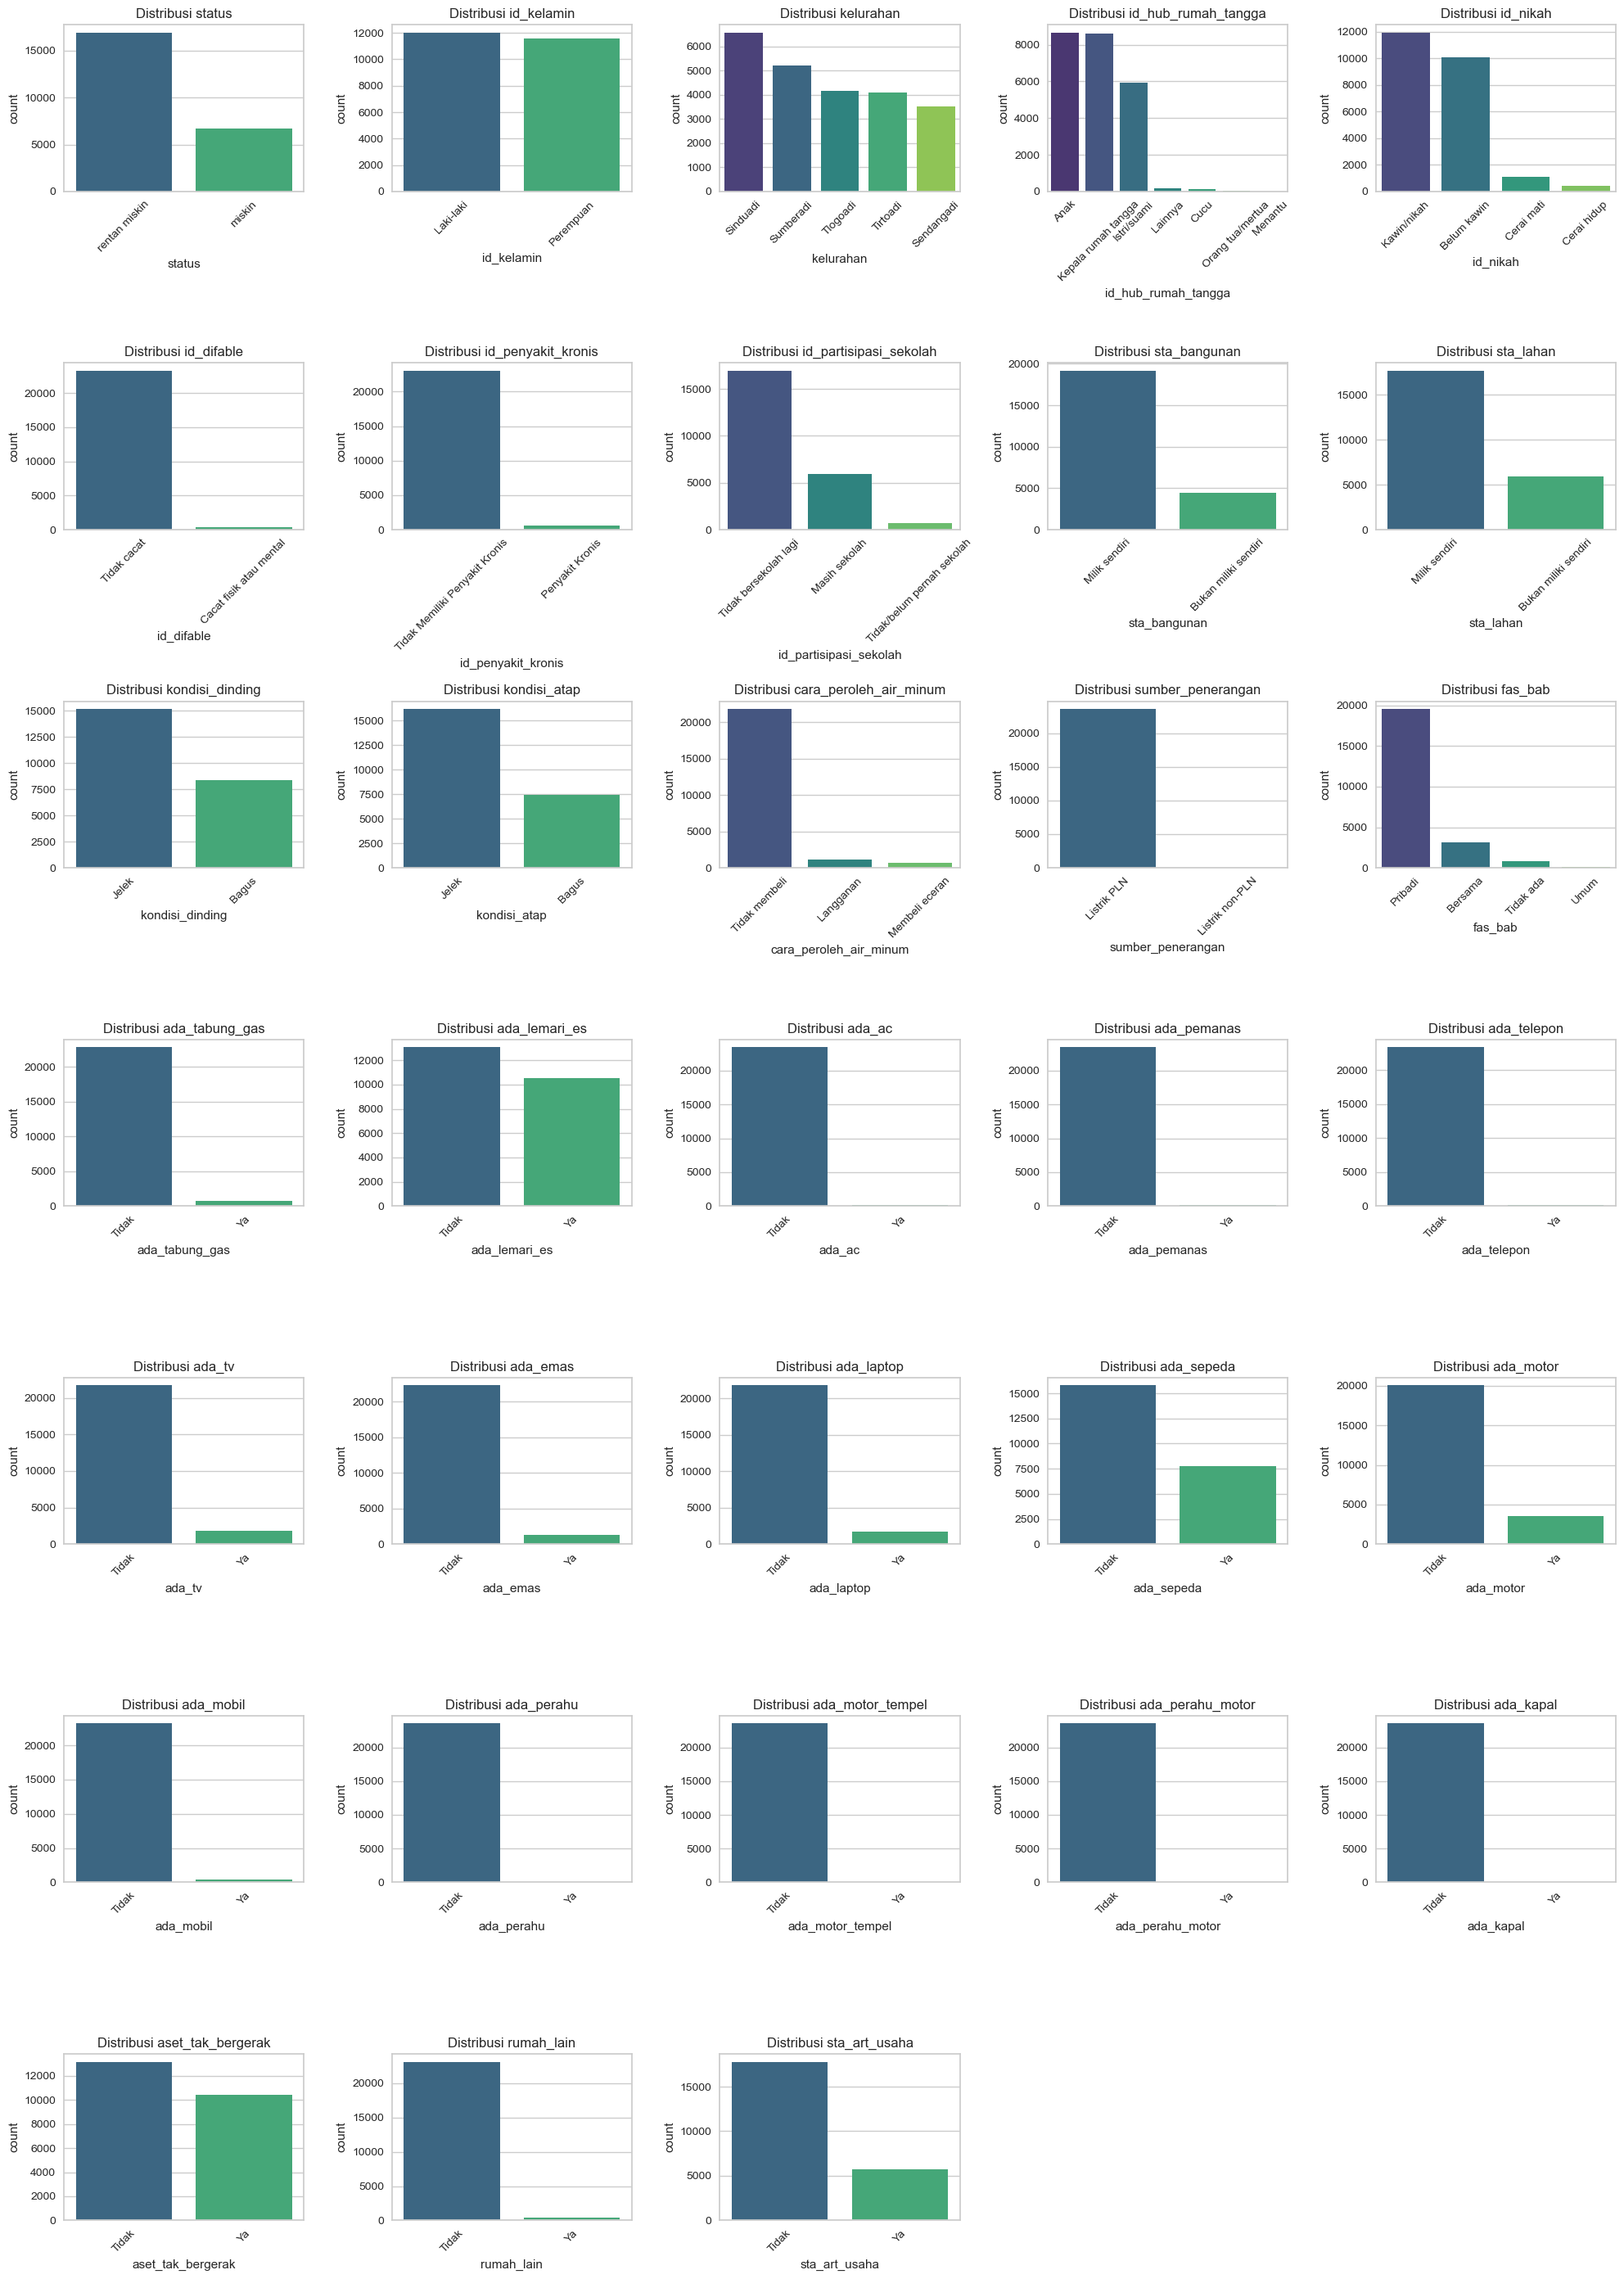

In [111]:
# Analisis Distribusi Data Kategorikal 
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

n_cols = 5
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=column, palette='viridis', order=df[column].value_counts().index)
    plt.title(f'Distribusi {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

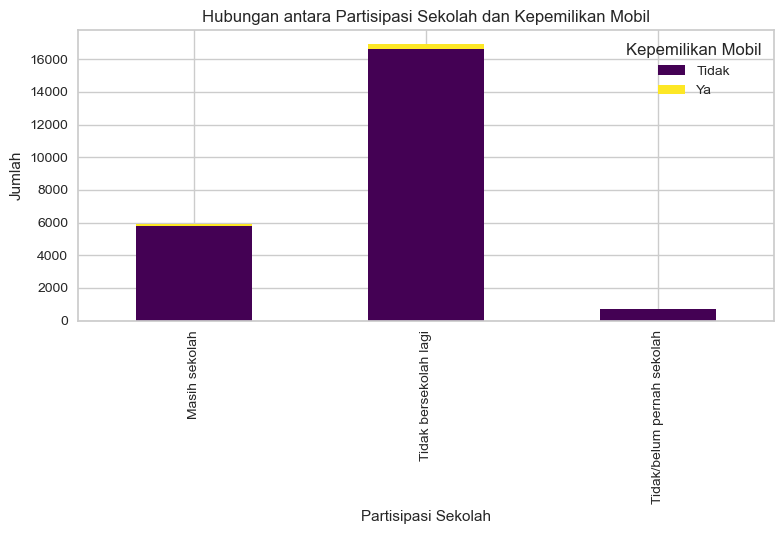

In [112]:
# Hubungan antara id_partisipasi_sekolah dan kepemilikan mobil
plt.figure(figsize=(10, 6))
crosstab = pd.crosstab(df['id_partisipasi_sekolah'], df['ada_mobil'])
crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Hubungan antara Partisipasi Sekolah dan Kepemilikan Mobil')
plt.xlabel('Partisipasi Sekolah')
plt.ylabel('Jumlah')
plt.legend(title='Kepemilikan Mobil')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

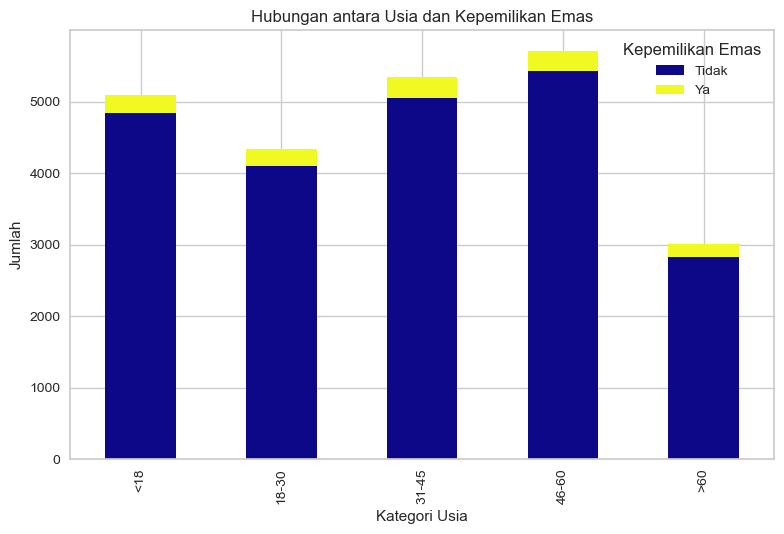

In [113]:
# Hubungan antara usia dan kepemilikan aset
plt.figure(figsize=(12, 8))
# Membuat kategori usia untuk memudahkan visualisasi
df['kategori_usia'] = pd.cut(df['usia'], bins=[0, 18, 30, 45, 60, 100], labels=['<18', '18-30', '31-45', '46-60', '>60'])
crosstab = pd.crosstab(df['kategori_usia'], df['ada_emas'])
crosstab.plot(kind='bar', stacked=True, colormap='plasma')
plt.title('Hubungan antara Usia dan Kepemilikan Emas')
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah')
plt.legend(title='Kepemilikan Emas')
plt.tight_layout()
plt.show()

Kita bisa melihat hubungan antara usia dan emas serta pendidikan dan kepmeilkan mobil, yang menandakan data data yang ada disini 96% ialah orang yang miskin atau tidak mampu

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [114]:
# Pemilihan fitur yang relevan untuk clustering
selected_features = [
    # demografi dan status keluarga serta Kondisi kesehatan
    'jml_anggota_keluarga', 'id_difable', 'id_penyakit_kronis',
    
    # pendidikan
    'id_partisipasi_sekolah',
    
    # kondisi hunian
    'sta_bangunan', 'sta_lahan', 'luas_lantai', 'lantai', 'dinding',
    'kondisi_dinding', 'atap', 'kondisi_atap', 'jumlah_kamar',
    
    # fasilitas dan utilitas
    'sumber_air_minum', 'cara_peroleh_air_minum', 'sumber_penerangan',
    'daya', 'bb_masak', 'fas_bab', 'kloset', 'buang_tinja',
    
    # aset dan kepemilikan
    'ada_tabung_gas', 'ada_lemari_es', 'ada_ac', 'ada_pemanas',
    'ada_telepon', 'ada_tv', 'ada_emas', 'ada_laptop',
    'ada_sepeda', 'ada_motor', 'ada_mobil', 'aset_tak_bergerak',
    'rumah_lain', 'sta_art_usaha'
]

# total fitur yang dipilih
len(selected_features)

35

In [115]:
# Membuat subset data dengan fitur yang dipilih
data_for_clustering = df[selected_features].copy()
data_for_clustering = data_for_clustering.reset_index(drop=True)
data_for_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23567 entries, 0 to 23566
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jml_anggota_keluarga    23567 non-null  int64  
 1   id_difable              23567 non-null  object 
 2   id_penyakit_kronis      23567 non-null  object 
 3   id_partisipasi_sekolah  23567 non-null  object 
 4   sta_bangunan            23567 non-null  object 
 5   sta_lahan               23567 non-null  object 
 6   luas_lantai             23567 non-null  float64
 7   lantai                  23567 non-null  float64
 8   dinding                 23567 non-null  float64
 9   kondisi_dinding         23567 non-null  object 
 10  atap                    23567 non-null  float64
 11  kondisi_atap            23567 non-null  object 
 12  jumlah_kamar            23567 non-null  float64
 13  sumber_air_minum        23567 non-null  float64
 14  cara_peroleh_air_minum  23567 non-null

Dan setelah kita pilih feature yang mau kita pakai, saya lakukan kembali memeriksa duplikat apakah setelah di hapus beberapa fitur bisa saja terjadi duplikat, karena secara alami setelah feature reduction, beberapa data kehilangan pembeda dan akhirnya numpuk jadi duplikat.

In [116]:
duplicates = data_for_clustering[data_for_clustering.duplicated()]

print(duplicates)

       jml_anggota_keluarga   id_difable              id_penyakit_kronis  \
1                         3  Tidak cacat  Tidak Memiliki Penyakit Kronis   
2                         3  Tidak cacat  Tidak Memiliki Penyakit Kronis   
4                         3  Tidak cacat  Tidak Memiliki Penyakit Kronis   
5                         3  Tidak cacat  Tidak Memiliki Penyakit Kronis   
8                         3  Tidak cacat  Tidak Memiliki Penyakit Kronis   
...                     ...          ...                             ...   
23552                     3  Tidak cacat  Tidak Memiliki Penyakit Kronis   
23554                     2  Tidak cacat  Tidak Memiliki Penyakit Kronis   
23562                     3  Tidak cacat  Tidak Memiliki Penyakit Kronis   
23565                     4  Tidak cacat  Tidak Memiliki Penyakit Kronis   
23566                     4  Tidak cacat  Tidak Memiliki Penyakit Kronis   

      id_partisipasi_sekolah          sta_bangunan             sta_lahan  \
1      Tida

Ternyata benar kita memiliki banyak sekali duplikat maka dari itu kita akan segera hapus

In [117]:
data_for_clustering = data_for_clustering.drop_duplicates()
 
duplicates = data_for_clustering[data_for_clustering.duplicated()]

print(duplicates)

Empty DataFrame
Columns: [jml_anggota_keluarga, id_difable, id_penyakit_kronis, id_partisipasi_sekolah, sta_bangunan, sta_lahan, luas_lantai, lantai, dinding, kondisi_dinding, atap, kondisi_atap, jumlah_kamar, sumber_air_minum, cara_peroleh_air_minum, sumber_penerangan, daya, bb_masak, fas_bab, kloset, buang_tinja, ada_tabung_gas, ada_lemari_es, ada_ac, ada_pemanas, ada_telepon, ada_tv, ada_emas, ada_laptop, ada_sepeda, ada_motor, ada_mobil, aset_tak_bergerak, rumah_lain, sta_art_usaha]
Index: []

[0 rows x 35 columns]


In [118]:
print("\nJumlah nilai yang hilang per kolom:")
missing_values = data_for_clustering.isnull().sum()
print(missing_values[missing_values > 0])


Jumlah nilai yang hilang per kolom:
Series([], dtype: int64)


Data sudah bersih kembali

Jadi dari 44 fitur kita akan memilih 35 fitur untuk di proses

Beberapa fitur numerical butuh kita atasi outlier berdasrkan data outlier yang telah kita temukan di part 4. Terkhususnya luas_lantai, jumlah_kamar yang sangat sedikit jauh dari sebenernya mungkin terjadinya human eror. Sedangkan data outlier yang lain pada kolom yang bebeda memamng mungkin aslinya seperti itu.

Beriku code untuk mengatasi masalah ini.

In [119]:
# Fitur yang ingin difilter dari outlier
features_to_filter = ['luas_lantai', 'jumlah_kamar']

# Salin dulu data agar tidak merusak aslinya
cleaned_data = data_for_clustering.copy()

# Terapkan IQR filtering untuk masing-masing fitur
for feature in features_to_filter:
    Q1 = cleaned_data[feature].quantile(0.25)
    Q3 = cleaned_data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Filter baris yang tidak outlier pada fitur ini
    condition = (cleaned_data[feature] >= (Q1 - 1.5 * IQR)) & (cleaned_data[feature] <= (Q3 + 1.5 * IQR))
    cleaned_data = cleaned_data[condition]

# Update kembali data_for_clustering
data_for_clustering = cleaned_data

# Cek hasilnya
print(f"Jumlah data setelah outlier dihapus: {len(data_for_clustering)} baris")


Jumlah data setelah outlier dihapus: 13444 baris


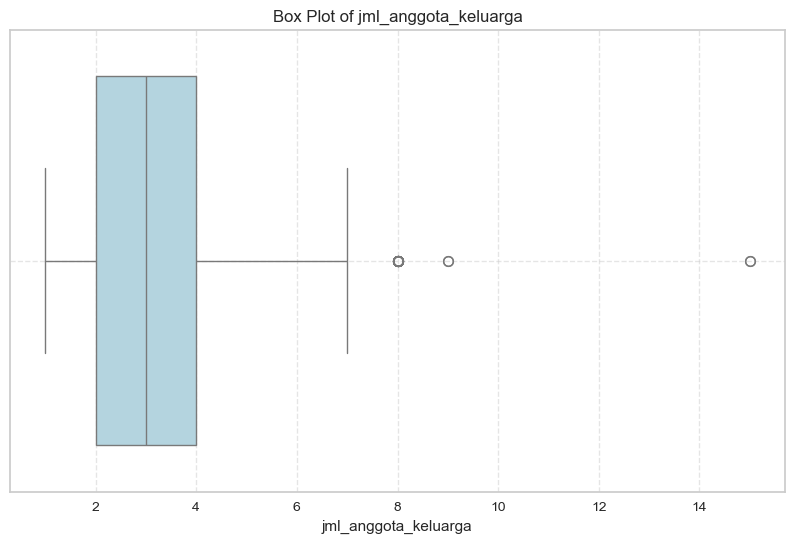

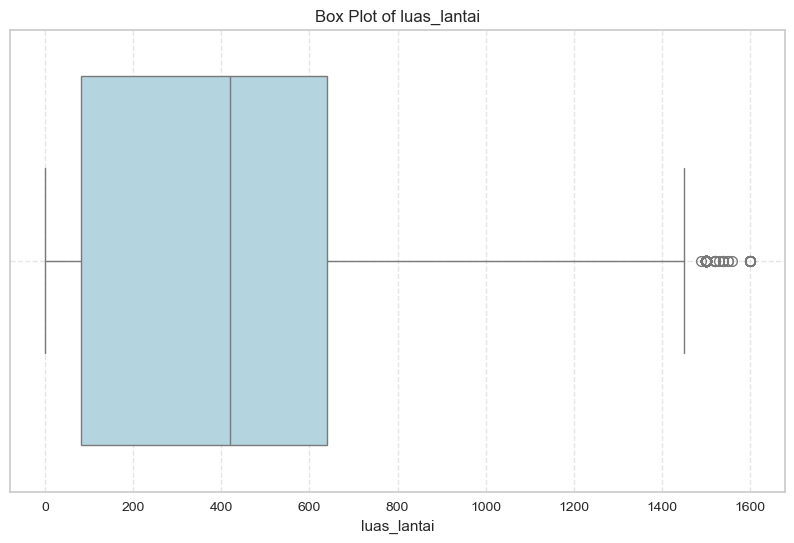

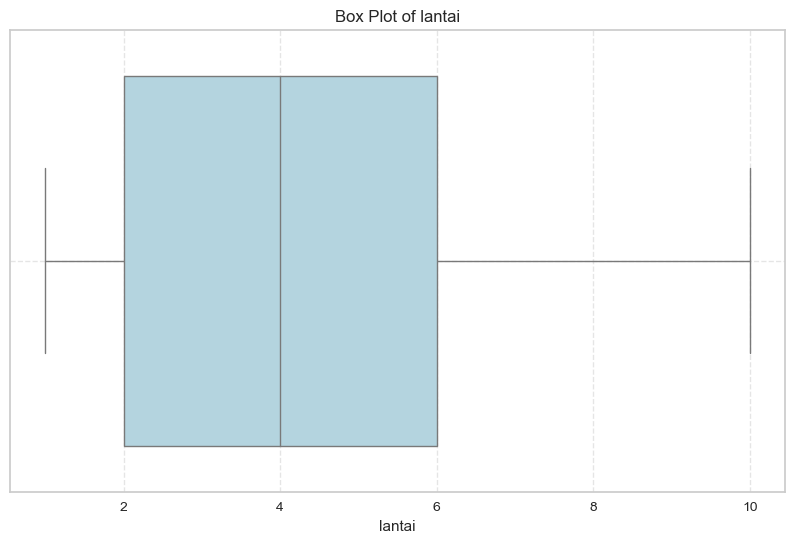

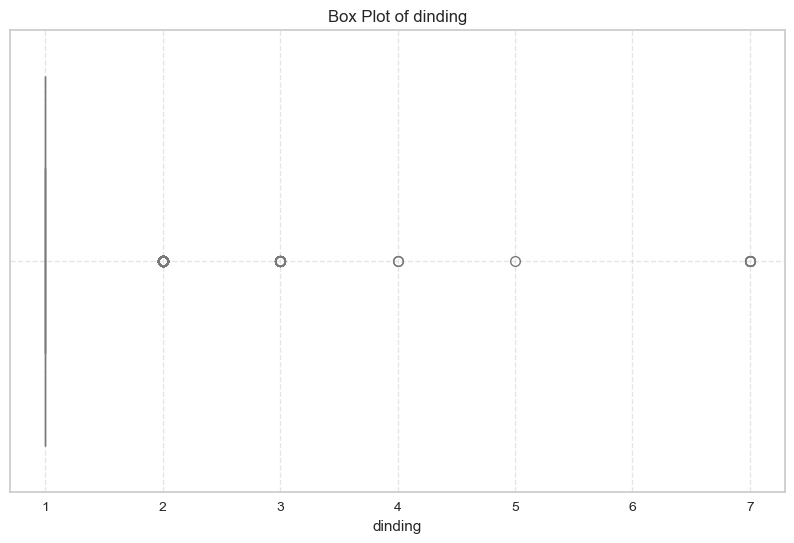

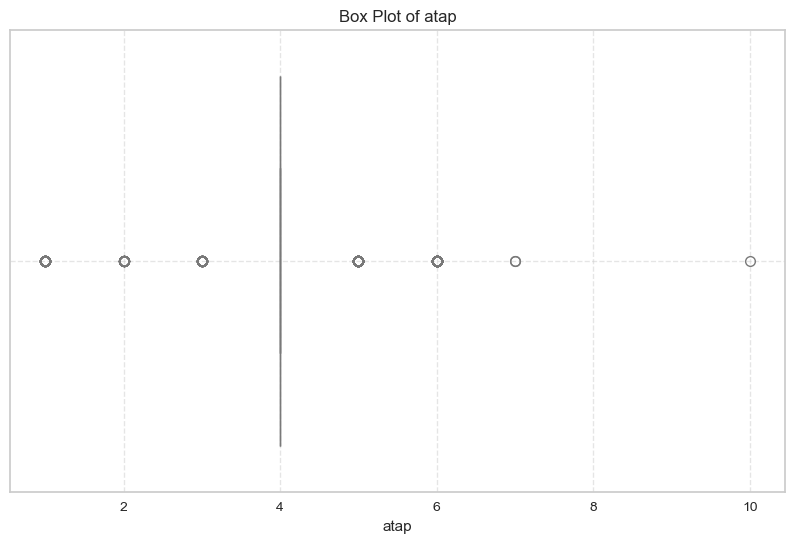

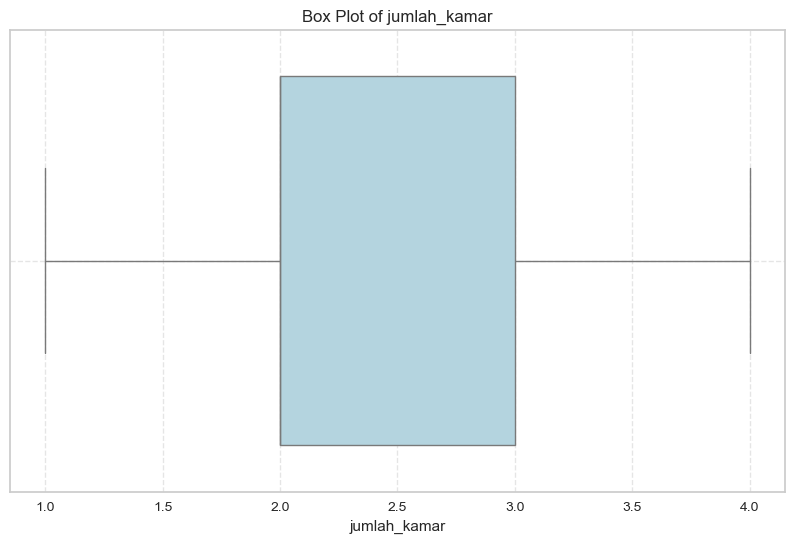

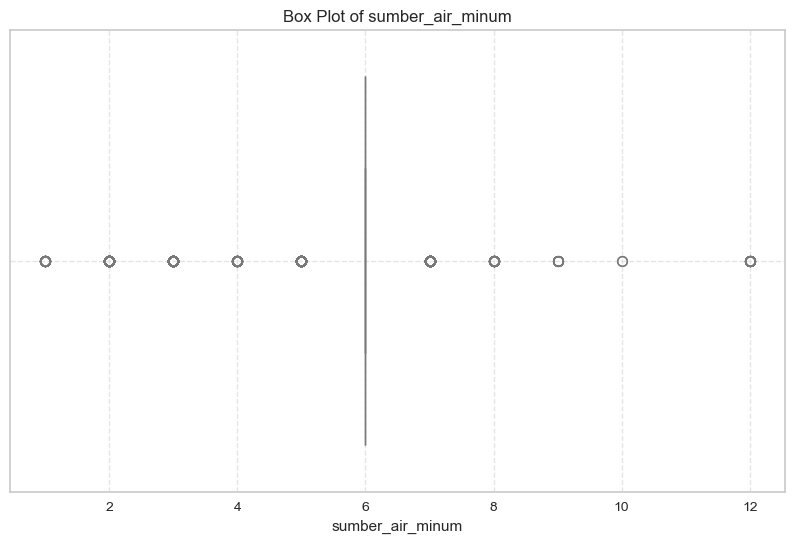

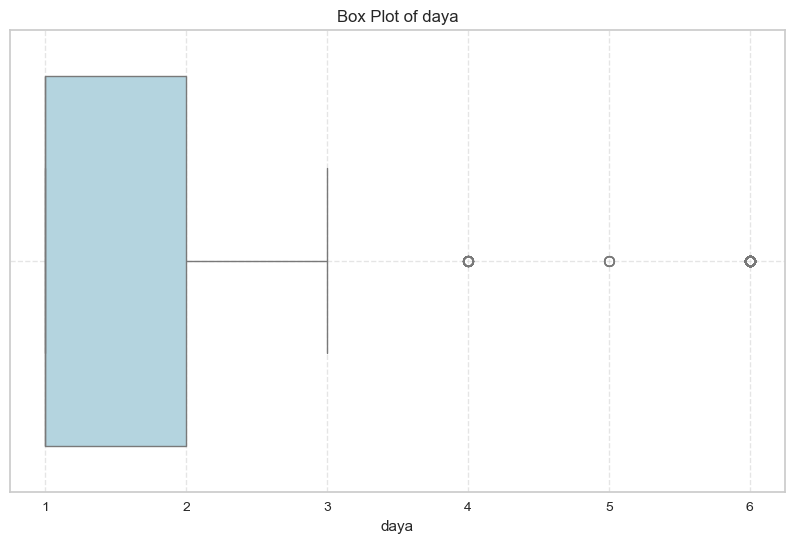

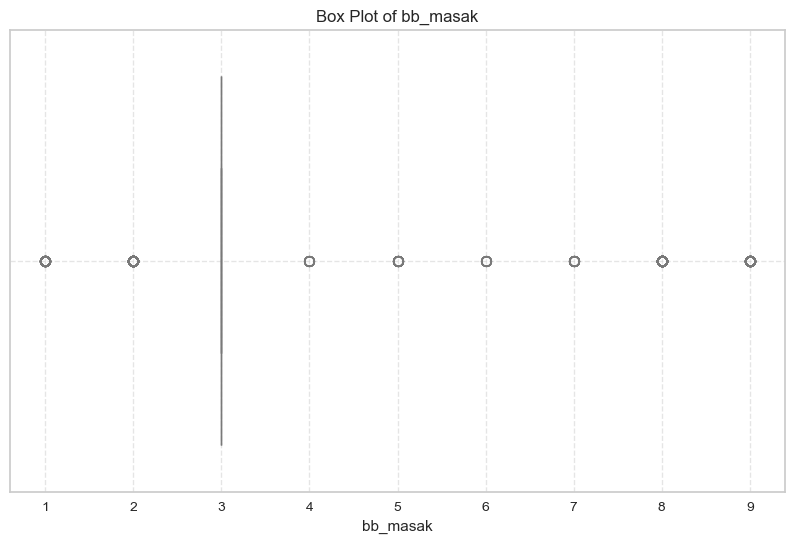

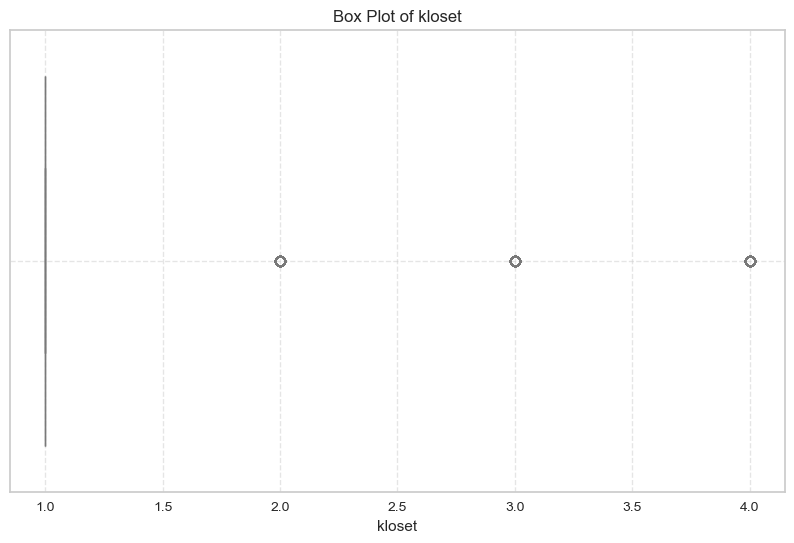

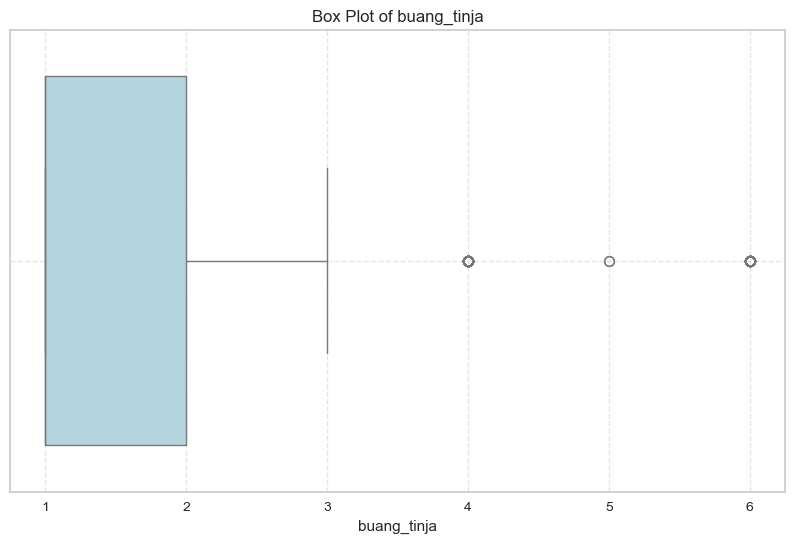

In [120]:
# Ambil semua kolom numerik
numerical_columns_after_select = data_for_clustering.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Loop satu per satu dan tampilkan boxplot
for feature in numerical_columns_after_select:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_for_clustering[feature], color='lightblue')
    plt.title(f'Box Plot of {feature}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


Outlier sudah ditangani

Sekarang kita akan melakukan Encoding Data Kategorikal
Encoding diterapkan pada fitur kategorikal dalam dataset untuk mempersiapkan data bagi algoritma pembelajaran mesin. Kita akan menggunakan value yang sudah di tetapkan oleh pemilik data sebelumnya untuk mengonversi nilai kategorikal menjadi format numerik yang dapat diproses oleh model.

In [121]:
# Salin data agar tidak merusak aslinya (opsional)
encoded_data = data_for_clustering.copy()

# Mapping manual kategori ke angka sesuai definisi awal

# id_difable dan id_penyakit_kronis
encoded_data['id_difable'] = encoded_data['id_difable'].replace({
    'Tidak cacat': 0, 'Cacat fisik atau mental': 1
})
encoded_data['id_penyakit_kronis'] = encoded_data['id_penyakit_kronis'].replace({
    'Tidak Memiliki Penyakit Kronis': 0, 'Penyakit Kronis': 1
})

# id_partisipasi_sekolah
encoded_data['id_partisipasi_sekolah'] = encoded_data['id_partisipasi_sekolah'].replace({
    'Tidak/belum pernah sekolah': 0,
    'Masih sekolah': 1,
    'Tidak bersekolah lagi': 2
})

# sta_bangunan dan sta_lahan
encoded_data['sta_bangunan'] = encoded_data['sta_bangunan'].replace({'Milik sendiri': 1, 'Bukan miliki sendiri': 0})
encoded_data['sta_lahan'] = encoded_data['sta_lahan'].replace({'Milik sendiri': 1, 'Bukan miliki sendiri': 0})

# kondisi_dinding dan kondisi_atap
encoded_data['kondisi_dinding'] = encoded_data['kondisi_dinding'].replace({'Bagus': 1, 'Jelek': 0})
encoded_data['kondisi_atap'] = encoded_data['kondisi_atap'].replace({'Bagus': 1, 'Jelek': 0})

# cara_peroleh_air_minum
encoded_data['cara_peroleh_air_minum'] = encoded_data['cara_peroleh_air_minum'].replace({
    'Membeli eceran': 1,
    'Langganan': 2,
    'Tidak membeli': 3
})

# sumber_penerangan
encoded_data['sumber_penerangan'] = encoded_data['sumber_penerangan'].replace({
    'Listrik PLN': 1,
    'Listrik non-PLN': 0
})

# fas_bab
encoded_data['fas_bab'] = encoded_data['fas_bab'].replace({
    'Pribadi': 1,
    'Bersama': 2,
    'Umum': 3,
    'Tidak ada': 4
})

# Boolean: Ya/Tidak jadi 1/0
bool_cols = ['ada_tabung_gas', 'ada_lemari_es', 'ada_ac', 'ada_pemanas',
             'ada_telepon', 'ada_tv', 'ada_emas', 'ada_laptop',
             'ada_sepeda', 'ada_motor', 'ada_mobil', 'aset_tak_bergerak',
             'rumah_lain', 'sta_art_usaha']

for col in bool_cols:
    if col in encoded_data.columns:
        encoded_data[col] = encoded_data[col].replace({'Ya': 1, 'Tidak': 0})


# Kembalikan ke variabel utama
data_for_clustering = encoded_data.copy()


In [122]:
data_for_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13444 entries, 0 to 23564
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jml_anggota_keluarga    13444 non-null  int64  
 1   id_difable              13444 non-null  int64  
 2   id_penyakit_kronis      13444 non-null  int64  
 3   id_partisipasi_sekolah  13444 non-null  int64  
 4   sta_bangunan            13444 non-null  int64  
 5   sta_lahan               13444 non-null  int64  
 6   luas_lantai             13444 non-null  float64
 7   lantai                  13444 non-null  float64
 8   dinding                 13444 non-null  float64
 9   kondisi_dinding         13444 non-null  int64  
 10  atap                    13444 non-null  float64
 11  kondisi_atap            13444 non-null  int64  
 12  jumlah_kamar            13444 non-null  float64
 13  sumber_air_minum        13444 non-null  float64
 14  cara_peroleh_air_minum  13444 non-null  int

Semua type object telah menjadi number, dan mari kita pisahkan number yang asli dari data. Guna untuk kita di standarisasikan dengan data yang benar benar numerikal sebelumnya.

Sekarang kita akan mengatasi scaling (Normalisasi) atau sering disebut standarisasi. Standardisasi penting untuk memastikan bahwa fitur asli numerikal dalam dataset memiliki skala yang sama sehingga mempermudah model untuk belajar dengan lebih baik dan memberikan hasil yang lebih akurat serta stabil. Berikut Code nya

In [123]:
numerical_cols = [
    'jml_anggota_keluarga', 'luas_lantai', 'lantai', 'dinding', 'atap',
    'jumlah_kamar', 'sumber_air_minum', 'daya', 'bb_masak', 'kloset', 'buang_tinja'
]

categorical_cols = list(set(encoded_data.columns) - set(numerical_cols))


In [124]:

# Step 4: Standarisasi numerik
scaler = StandardScaler()
X_numerical_scaled_35 = scaler.fit_transform(encoded_data[numerical_cols])

# Step 5: Gabungkan numerik (yang sudah distandarisasi) + kategorikal (apa adanya)
X_ready_for_clustering_35 = np.concatenate([
    X_numerical_scaled_35,
    encoded_data[categorical_cols].values
], axis=1)

# OPTIONAL: Kalau mau ke DataFrame lagi
final_columns = numerical_cols + categorical_cols
X_ready_df_35 = pd.DataFrame(X_ready_for_clustering_35, columns=final_columns)

In [125]:
X_ready_df_35.describe()

,jml_anggota_keluarga,luas_lantai,lantai,dinding,atap,jumlah_kamar,sumber_air_minum,daya,bb_masak,kloset,...,id_difable,cara_peroleh_air_minum,ada_tabung_gas,ada_emas,ada_laptop,kondisi_atap,aset_tak_bergerak,sta_bangunan,ada_mobil,rumah_lain
count,1.344400e+04,1.344400e+04,1.344400e+04,1.344400e+04,1.344400e+04,1.344400e+04,1.344400e+04,1.344400e+04,1.344400e+04,1.344400e+04,...,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000,13444.000000
mean,-1.226167e-16,-4.228163e-18,-1.310730e-16,-1.733547e-16,-5.116077e-16,-8.033509e-17,-1.691265e-17,-8.879142e-17,-2.536898e-17,7.293581e-17,...,0.023356,2.891773,0.031613,0.048051,0.069771,0.307795,0.449643,0.800431,0.015472,0.016959
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,...,0.151038,0.394820,0.174973,0.213882,0.254770,0.461599,0.497476,0.399691,0.123423,0.129123
min,-1.653965e+00,-1.229539e+00,-1.559283e+00,-9.572701e-02,-6.974427e+00,-1.508068e+00,-4.673217e+00,-5.401793e-01,-1.453906e+00,-2.980215e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.714792e-01,-1.002635e+00,-1.077851e+00,-9.572701e-02,-4.398968e-02,-2.005441e-01,1.704880e-01,-5.401793e-01,-5.363035e-01,-2.980215e-01,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-8.899297e-02,-5.299957e-02,-1.149865e-01,-9.572701e-02,-4.398968e-02,-2.005441e-01,1.704880e-01,-5.401793e-01,-5.363035e-01,-2.980215e-01,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.934933e-01,5.632830e-01,8.478776e-01,-9.572701e-02,-4.398968e-02,1.106980e+00,1.704880e-01,1.602615e-01,-5.363035e-01,-2.980215e-01,...,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,9.300842e+00,3.252516e+00,2.773606e+00,3.234849e+01,1.381688e+01,2.414504e+00,5.982934e+00,2.962025e+00,2.216505e+00,4.220702e+00,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Untuk lebih detailnya, mari kita lihat visualisainya ini

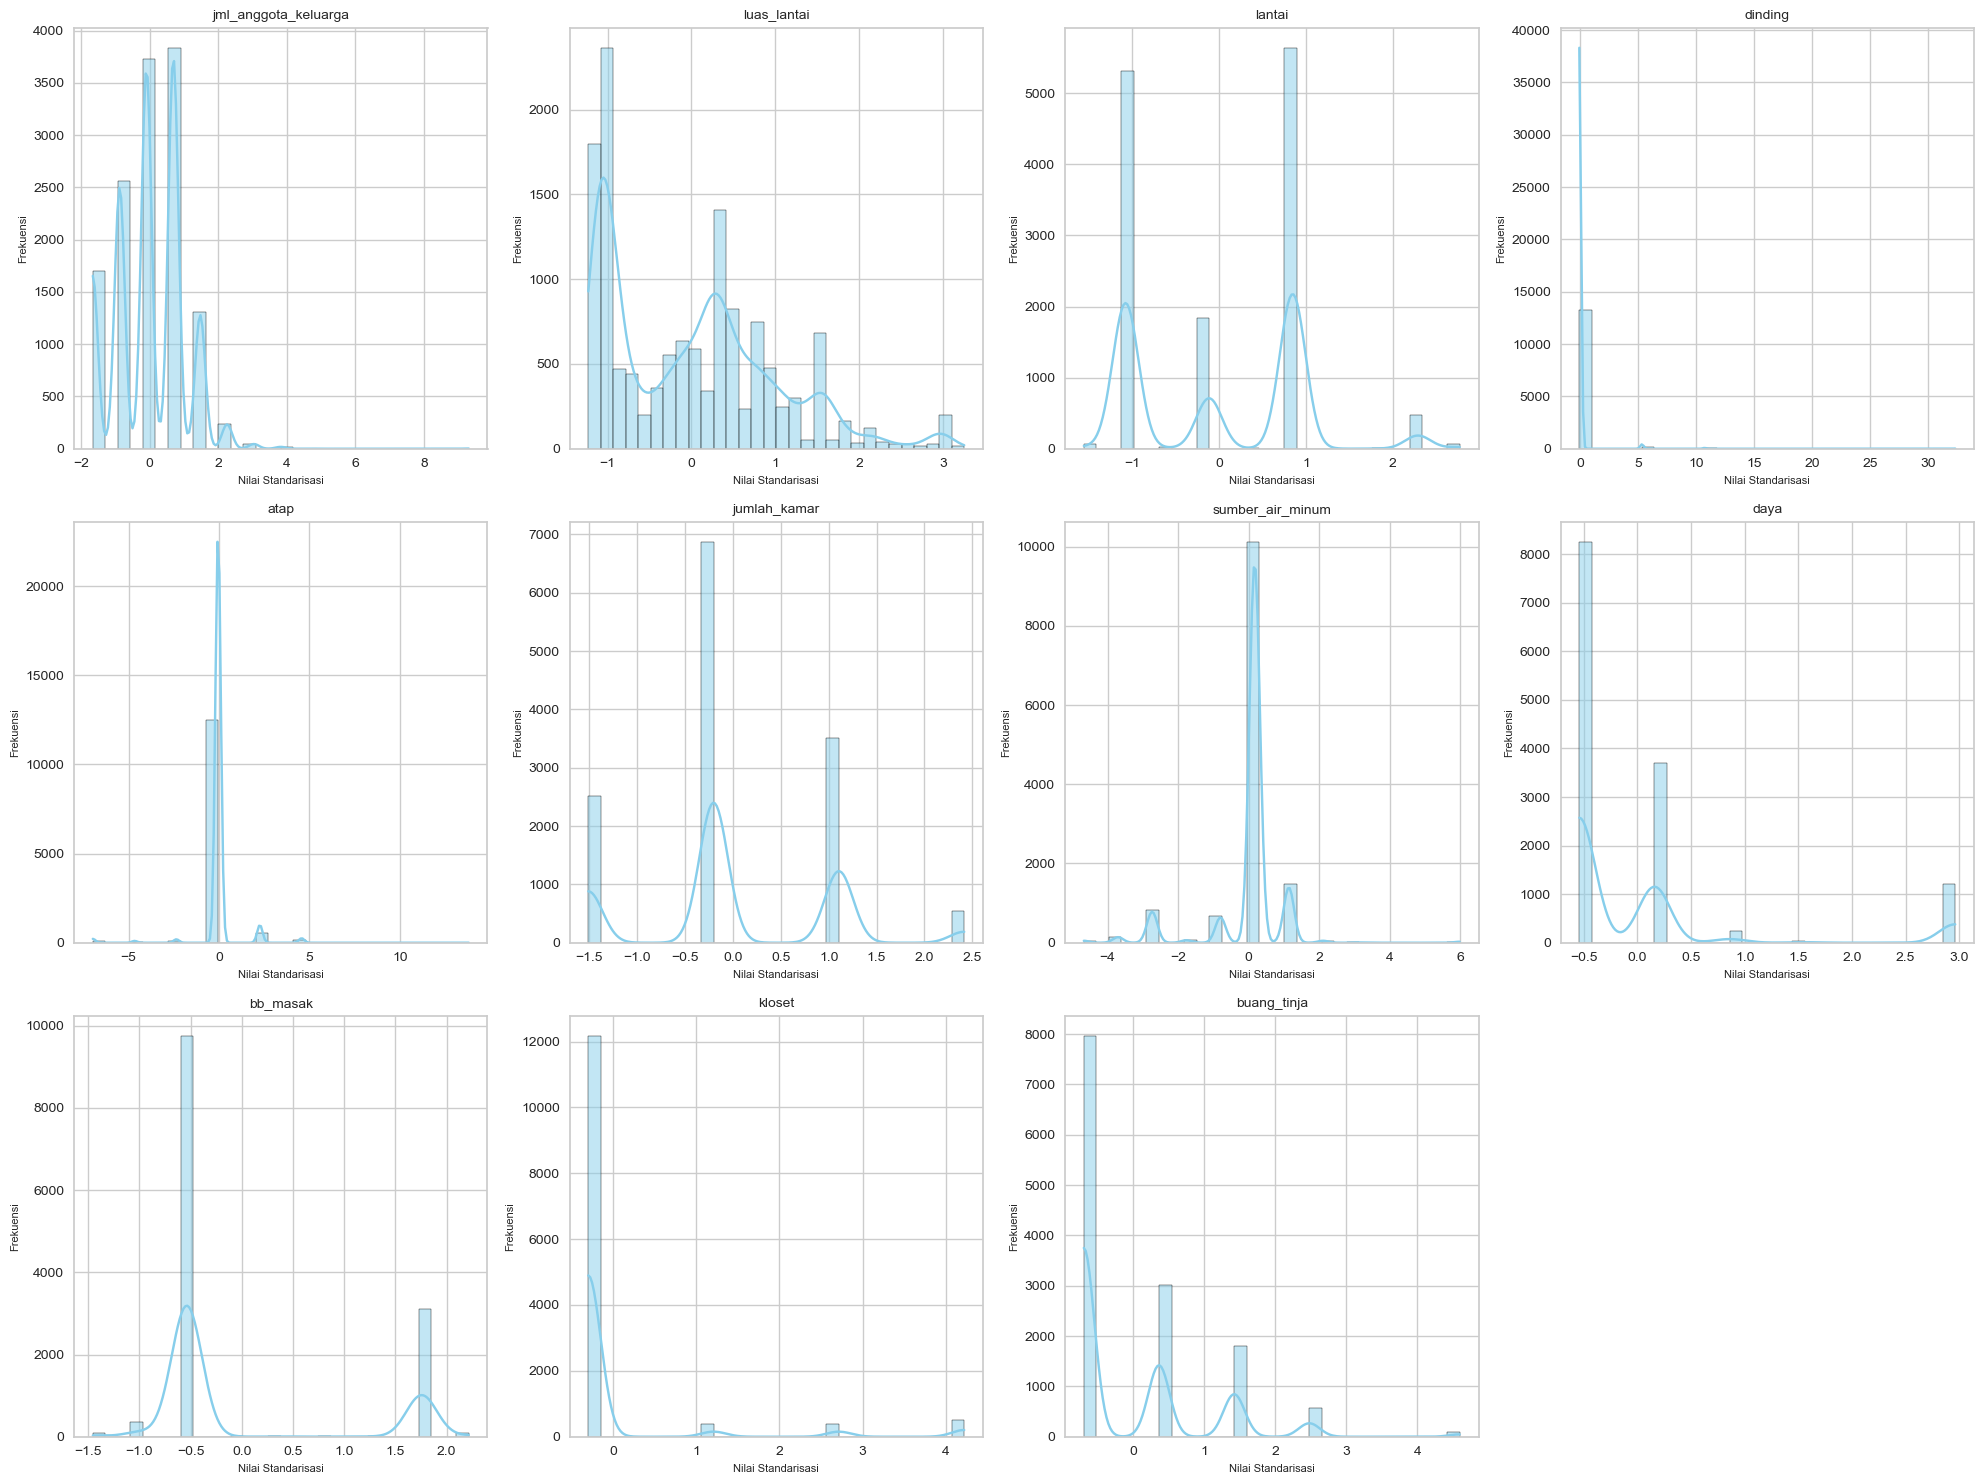

In [126]:

# Tentukan ukuran subplot berdasarkan jumlah fitur (38 fitur)
n_cols = 4  # Jumlah kolom dalam grid
n_rows = int(np.ceil(len(numerical_cols) / n_cols))  # Jumlah baris, dibulatkan ke atas

# Buat figure dan axes untuk subplot
plt.figure(figsize=(20, 5 * n_rows))  # Ukuran total figure disesuaikan

# Iterasi untuk setiap kolom numerik
for i, column in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=X_ready_df_35, x=column, kde=True, bins=30, color='skyblue')
    plt.title(f'{column}', fontsize=10)
    plt.xlabel('Nilai Standarisasi', fontsize=8)
    plt.ylabel('Frekuensi', fontsize=8)
    plt.tight_layout()

# Tampilkan visualisasi
plt.show()

Ini akan mengubah semua nilai numerik agar:
- Mean-nya 0
- Standard deviation-nya 1

Tujuannya agar model seperti K-Means nggak bias terhadap skala fitur yang besar kecil (contoh: luas_lantai bisa punya range besar, tapi jlm_anggota_keluar range kecil).

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Saya akan menggunakan K-Means

Saya telah menentukan K diawal yaitu ada 3 Cluster
- Cluster 1 = Sangat Membutuhkan Bantuan
- Cluster 2 = Membutuhkan Bantuan
- Cluster 3 = Belum Membutuhkan Bantuan

Namun pada part selanjutnya akan ada penentuan ulang K yang lebih optimal dengan menggunakan Elbow namun saat ini kita menggunkan K yang sudah saya tentukan

In [127]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_ready_df_35)

# Mendapatkan label cluster
labels = kmeans.labels_

# Jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X_df, labels, k):
    print("\nAnalisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X_df[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_values = cluster_data.mean(axis=0)

        print(f"\nCluster {cluster_id + 1}:")
        for col_name, mean in mean_values.items():
            print(f"{col_name}: {mean:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X_ready_df_35, labels, k)




Analisis Karakteristik Setiap Cluster:

Cluster 1:
jml_anggota_keluarga: 0.03
luas_lantai: 0.46
lantai: 0.13
dinding: -0.04
atap: 0.01
jumlah_kamar: 0.12
sumber_air_minum: 0.00
daya: -0.04
bb_masak: -0.55
kloset: -0.27
buang_tinja: -0.57
ada_pemanas: 0.00
sta_art_usaha: 0.34
kondisi_dinding: 0.42
fas_bab: 1.11
ada_telepon: 0.01
ada_tv: 0.05
ada_motor: 0.13
id_penyakit_kronis: 0.04
ada_ac: 0.00
ada_sepeda: 0.28
sumber_penerangan: 1.00
sta_lahan: 0.78
ada_lemari_es: 0.43
id_partisipasi_sekolah: 1.63
id_difable: 0.02
cara_peroleh_air_minum: 2.89
ada_tabung_gas: 0.03
ada_emas: 0.07
ada_laptop: 0.07
kondisi_atap: 0.39
aset_tak_bergerak: 0.26
sta_bangunan: 0.86
ada_mobil: 0.02
rumah_lain: 0.03

Cluster 2:
jml_anggota_keluarga: -0.27
luas_lantai: 0.43
lantai: 0.46
dinding: -0.03
atap: -0.02
jumlah_kamar: -0.15
sumber_air_minum: 0.20
daya: 0.13
bb_masak: 1.76
kloset: 0.19
buang_tinja: -0.19
ada_pemanas: 0.00
sta_art_usaha: 0.28
kondisi_dinding: 0.26
fas_bab: 1.45
ada_telepon: 0.00
ada_tv: 0.1

## **b. Evaluasi Model Clustering**

Memang saya sudah berhasil ngeclustering data memakai nilai k = 3, namun disini kita akan mengevaluasi kembali clustering menggunakan  Elbow Method Juga Silhoutte Score untuk menentukan Jumlah optimal Cluster dan Hitung Silhoutte Score untuk ukuran kualiatas cluster

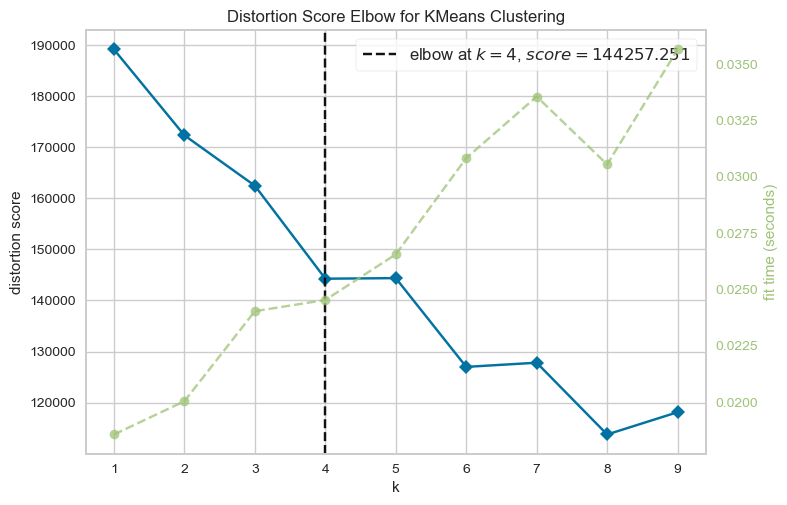

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [128]:
# Inisialisasi model KMeans
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk mencari jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data_for_clustering
visualizer.fit(X_ready_df_35)

# Menampilkan grafik elbow
visualizer.show()

In [129]:
# Rentang jumlah cluster yang akan diuji
range_k = range(2, 11)

# Menyimpan hasil evaluasi
distortions = []
silhouette_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_ready_df_35)
    
    # Distortion / Inertia
    distortions.append(kmeans.inertia_)
    
    # Silhouette Score
    score = silhouette_score(X_ready_df_35, kmeans.labels_)
    silhouette_scores.append(score)

# Tampilkan hasilnya
for i, k in enumerate(range_k):
    print(f"k = {k} | Distortion = {distortions[i]:.2f} | Silhouette Score = {silhouette_scores[i]:.4f}")


k = 2 | Distortion = 171093.26 | Silhouette Score = 0.1223
k = 3 | Distortion = 154523.44 | Silhouette Score = 0.1219
k = 4 | Distortion = 144256.37 | Silhouette Score = 0.1173
k = 5 | Distortion = 135508.02 | Silhouette Score = 0.1231
k = 6 | Distortion = 129352.24 | Silhouette Score = 0.1152
k = 7 | Distortion = 121227.44 | Silhouette Score = 0.1225
k = 8 | Distortion = 113769.26 | Silhouette Score = 0.1299
k = 9 | Distortion = 113878.39 | Silhouette Score = 0.1142
k = 10 | Distortion = 111268.92 | Silhouette Score = 0.1053


Kita bisa lihat ternyata elbow method menunjukan optimalnya ada pada at k = 4, walaupun kita awal sudah menentukan 3. Maka dari itu kembali kita jalan code untuk Silhoutte Score terlebih dahulu dan hasilnya kurang lebih sama dengan Elbow, sehingga saya memutuskan K = 4 

In [130]:
#Final Clustering K=4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_ready_df_35)
labels = kmeans.labels_
k = 3

# 3. Analisis Karakteristik per Cluster
def analyze_clusters(X_df, labels, k):
    print("\nAnalisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X_df[labels == cluster_id]
        mean_values = cluster_data.mean(axis=0)
        print(f"\n==== Cluster {cluster_id + 1} ====")
        for col_name, mean in mean_values.items():
            print(f"{col_name}: {mean:.2f}")

analyze_clusters(X_ready_df_35, labels, k)


Analisis Karakteristik Setiap Cluster:

==== Cluster 1 ====
jml_anggota_keluarga: 0.02
luas_lantai: 0.52
lantai: 0.15
dinding: -0.04
atap: 0.00
jumlah_kamar: 0.15
sumber_air_minum: 0.04
daya: -0.05
bb_masak: -0.55
kloset: -0.25
buang_tinja: -0.56
ada_pemanas: 0.00
sta_art_usaha: 0.34
kondisi_dinding: 0.42
fas_bab: 1.11
ada_telepon: 0.01
ada_tv: 0.05
ada_motor: 0.13
id_penyakit_kronis: 0.04
ada_ac: 0.00
ada_sepeda: 0.27
sumber_penerangan: 1.00
sta_lahan: 0.79
ada_lemari_es: 0.42
id_partisipasi_sekolah: 1.64
id_difable: 0.02
cara_peroleh_air_minum: 2.90
ada_tabung_gas: 0.03
ada_emas: 0.07
ada_laptop: 0.07
kondisi_atap: 0.39
aset_tak_bergerak: 0.24
sta_bangunan: 0.87
ada_mobil: 0.02
rumah_lain: 0.02

==== Cluster 2 ====
jml_anggota_keluarga: -0.27
luas_lantai: 0.43
lantai: 0.43
dinding: -0.03
atap: -0.01
jumlah_kamar: -0.13
sumber_air_minum: 0.16
daya: 0.06
bb_masak: 1.77
kloset: -0.26
buang_tinja: -0.51
ada_pemanas: 0.00
sta_art_usaha: 0.28
kondisi_dinding: 0.27
fas_bab: 1.18
ada_telepo

In [131]:
# 4. Hitung Silhouette Score
silhouette_avg = silhouette_score(X_ready_df_35, labels)
print(f"\nSilhouette Score untuk K=4: {silhouette_avg:.4f}")


Silhouette Score untuk K=4: 0.1174


## **c. Feature Selection (Opsional)**

So saya akan kurang puas dengan hasil diatas, maka dari itu saya akan memakai feature selection, dan label nya saya buat 4 clustering yang sudah saya berhasil buat.

In [132]:

# Pakai label hasil clustering awal sebagai pseudo-target
y_pseudo = labels  

# Inisialisasi Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih Random Forest untuk feature importance
rf_model.fit(X_ready_df_35, y_pseudo)


# Mengambil feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Threshold importance
threshold = 0.0045

# Ambil hanya fitur dengan importance >= threshold
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# Nama fitur penting
important_features = X_ready_df_35.columns[important_features_indices]

print("Fitur yang dipilih berdasarkan Embedded Methods:")
for i in important_features_indices:
    print(f"{X_ready_df_35.columns[i]}: {importances[i]:.4f}")

# Dataset baru hanya dengan fitur penting
X_important = X_ready_df_35[important_features]

print("\nDimensi data setelah feature selection:", X_important.shape)


Fitur yang dipilih berdasarkan Embedded Methods:
jml_anggota_keluarga: 0.0146
luas_lantai: 0.2090
lantai: 0.0400
jumlah_kamar: 0.0116
sumber_air_minum: 0.0118
daya: 0.0089
bb_masak: 0.3322
kloset: 0.0408
buang_tinja: 0.1339
sta_art_usaha: 0.0113
kondisi_dinding: 0.0058
fas_bab: 0.0385
ada_motor: 0.0072
ada_sepeda: 0.0076
sta_lahan: 0.0079
ada_lemari_es: 0.0119
id_partisipasi_sekolah: 0.0061
kondisi_atap: 0.0053
aset_tak_bergerak: 0.0660
sta_bangunan: 0.0078

Dimensi data setelah feature selection: (13444, 20)


OKEY setelah kita fiture selection automatis.
jadi kita akan ambil ulang 20 fitur ini dari data asli dan nanti kita preprocessing lagi, karena akan sulit di akhir untuk meninverse transform fitur karena dimensinya tidak sesui.

In [133]:
# Ambil 20 fitur dari data awal
selected_features_20 = [
    'jml_anggota_keluarga', 'luas_lantai', 'lantai',
    'jumlah_kamar', 'sumber_air_minum', 'daya', 'bb_masak', 'kloset',
    'buang_tinja', 'kondisi_dinding', 'fas_bab', 'sta_lahan', 'ada_sepeda',
    'aset_tak_bergerak', 'sta_art_usaha', 'ada_motor', 'kondisi_atap', 'ada_lemari_es',
    'id_partisipasi_sekolah', 'sta_bangunan'
]

data_for_clustering_from_FS = df[selected_features_20].copy()
data_for_clustering_from_FS = data_for_clustering_from_FS.reset_index(drop=True)


In [134]:
data_for_clustering_from_FS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23567 entries, 0 to 23566
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jml_anggota_keluarga    23567 non-null  int64  
 1   luas_lantai             23567 non-null  float64
 2   lantai                  23567 non-null  float64
 3   jumlah_kamar            23567 non-null  float64
 4   sumber_air_minum        23567 non-null  float64
 5   daya                    23567 non-null  float64
 6   bb_masak                23567 non-null  float64
 7   kloset                  23567 non-null  float64
 8   buang_tinja             23567 non-null  float64
 9   kondisi_dinding         23567 non-null  object 
 10  fas_bab                 23567 non-null  object 
 11  sta_lahan               23567 non-null  object 
 12  ada_sepeda              23567 non-null  object 
 13  aset_tak_bergerak       23567 non-null  object 
 14  sta_art_usaha           23567 non-null

In [135]:
# Hapus duplicate
data_for_clustering_from_FS = data_for_clustering_from_FS.drop_duplicates()

# Cek jumlah duplikat setelah dihapus
print(f"Jumlah data setelah hapus duplicate: {len(data_for_clustering_from_FS)}")


Jumlah data setelah hapus duplicate: 13339


In [136]:
# Cek missing values
missing_values = data_for_clustering_from_FS.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 Series([], dtype: int64)


In [137]:
# Atasi Outlier
cleaned_data = data_for_clustering_from_FS.copy()

features_to_filter = ['luas_lantai', 'jumlah_kamar']

# IQR filtering
for feature in features_to_filter:
    Q1 = cleaned_data[feature].quantile(0.25)
    Q3 = cleaned_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_data = cleaned_data[(cleaned_data[feature] >= lower_bound) & (cleaned_data[feature] <= upper_bound)]

# Update datanya
data_for_clustering_from_FS = cleaned_data

print(f"Jumlah data setelah hapus outlier: {len(data_for_clustering_from_FS)}")
data_for_clustering_from_FS = data_for_clustering_from_FS.reset_index(drop=True)


Jumlah data setelah hapus outlier: 12840


In [138]:
# Ubah kategorikal dengan Numerikal
encoded_data = data_for_clustering_from_FS.copy()

# Mapping kategori ke angka

encoded_data['kondisi_dinding'] = encoded_data['kondisi_dinding'].replace({'Bagus': 1, 'Jelek': 0})
encoded_data['fas_bab'] = encoded_data['fas_bab'].replace({
    'Pribadi': 1,
    'Bersama': 2,
    'Umum': 3,
    'Tidak ada': 4
})
encoded_data['sta_lahan'] = encoded_data['sta_lahan'].replace({'Milik sendiri': 1, 'Bukan miliki sendiri': 0})

encoded_data['id_partisipasi_sekolah'] = encoded_data['id_partisipasi_sekolah'].replace({
    'Tidak/belum pernah sekolah': 0,
    'Masih sekolah': 1,
    'Tidak bersekolah lagi': 2
})
encoded_data['sta_bangunan'] = encoded_data['sta_bangunan'].replace({'Milik sendiri': 1, 'Bukan miliki sendiri': 0})
encoded_data['kondisi_atap'] = encoded_data['kondisi_atap'].replace({'Bagus': 1, 'Jelek': 0})

# Boolean mapping
bool_cols = ['ada_lemari_es','ada_sepeda', 'ada_motor', 'aset_tak_bergerak', 'sta_art_usaha']

for col in bool_cols:
    if col in encoded_data.columns:
        encoded_data[col] = encoded_data[col].replace({'Ya': 1, 'Tidak': 0})

# Update data utama
data_for_clustering_from_FS = encoded_data.copy()



In [139]:
data_for_clustering_from_FS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12840 entries, 0 to 12839
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jml_anggota_keluarga    12840 non-null  int64  
 1   luas_lantai             12840 non-null  float64
 2   lantai                  12840 non-null  float64
 3   jumlah_kamar            12840 non-null  float64
 4   sumber_air_minum        12840 non-null  float64
 5   daya                    12840 non-null  float64
 6   bb_masak                12840 non-null  float64
 7   kloset                  12840 non-null  float64
 8   buang_tinja             12840 non-null  float64
 9   kondisi_dinding         12840 non-null  int64  
 10  fas_bab                 12840 non-null  int64  
 11  sta_lahan               12840 non-null  int64  
 12  ada_sepeda              12840 non-null  int64  
 13  aset_tak_bergerak       12840 non-null  int64  
 14  sta_art_usaha           12840 non-null

In [140]:
#  Pisahkan fitur numerikal dan kategorikal
numerical_cols = [
    'jml_anggota_keluarga', 'luas_lantai', 'lantai', 'jumlah_kamar',
    'sumber_air_minum', 'daya', 'bb_masak', 'kloset', 'buang_tinja'
]

categorical_cols = list(set(encoded_data.columns) - set(numerical_cols))


In [141]:

# Step Standarisasi numerik
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(encoded_data[numerical_cols])

# Step 5: Gabungkan numerik (yang sudah distandarisasi) + kategorikal (apa adanya)
X_ready_for_clustering = np.concatenate([
    X_numerical_scaled,
    encoded_data[categorical_cols].values
], axis=1)

# OPTIONAL: Kalau mau ke DataFrame lagi
final_columns = numerical_cols + categorical_cols
X_ready_df = pd.DataFrame(X_ready_for_clustering, columns=final_columns)

print(X_ready_df.head())

   jml_anggota_keluarga  luas_lantai    lantai  jumlah_kamar  \
0             -0.085103    -1.034292 -0.114750      1.111819   
1             -0.085103    -1.219319  0.848883     -0.195604   
2             -0.085103    -1.219319  0.848883     -0.195604   
3             -0.864505    -1.135216  0.848883     -0.195604   
4             -0.085103    -1.104378 -1.078384     -1.503028   

   sumber_air_minum      daya  bb_masak    kloset  buang_tinja  kondisi_atap  \
0          0.169913  0.154722 -0.536608 -0.299554    -0.690547           0.0   
1         -0.797146 -0.542096 -0.536608 -0.299554     1.413791           0.0   
2         -0.797146 -0.542096 -0.536608 -0.299554     1.413791           0.0   
3          0.169913 -0.542096 -0.536608 -0.299554     1.413791           0.0   
4          0.169913  0.851540 -0.536608  1.201139     1.413791           0.0   

   ada_sepeda  aset_tak_bergerak  id_partisipasi_sekolah  sta_art_usaha  \
0         0.0                1.0                     2.0   

In [142]:
print(type(X_ready_df))
print(X_ready_df.shape)


<class 'pandas.core.frame.DataFrame'>
(12840, 20)


Kita evaluasi lagi menggunakan silhoutte_score

In [143]:

# Rentang jumlah cluster yang akan diuji
range_k = range(2, 11)

# Menyimpan hasil evaluasi
distortions = []
silhouette_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_ready_df)
    
    # Distortion / Inertia
    distortions.append(kmeans.inertia_)
    
    # Silhouette Score
    score = silhouette_score(X_ready_df, kmeans.labels_)
    silhouette_scores.append(score)

# Tampilkan hasilnya
for i, k in enumerate(range_k):
    print(f"k = {k} | Distortion = {distortions[i]:.2f} | Silhouette Score = {silhouette_scores[i]:.4f}")


k = 2 | Distortion = 131695.50 | Silhouette Score = 0.1315
k = 3 | Distortion = 121190.02 | Silhouette Score = 0.1149
k = 4 | Distortion = 106104.15 | Silhouette Score = 0.1350
k = 5 | Distortion = 97350.53 | Silhouette Score = 0.1486
k = 6 | Distortion = 93494.52 | Silhouette Score = 0.1327
k = 7 | Distortion = 85884.54 | Silhouette Score = 0.1452
k = 8 | Distortion = 84124.13 | Silhouette Score = 0.1367
k = 9 | Distortion = 81584.56 | Silhouette Score = 0.1268
k = 10 | Distortion = 79548.34 | Silhouette Score = 0.1209


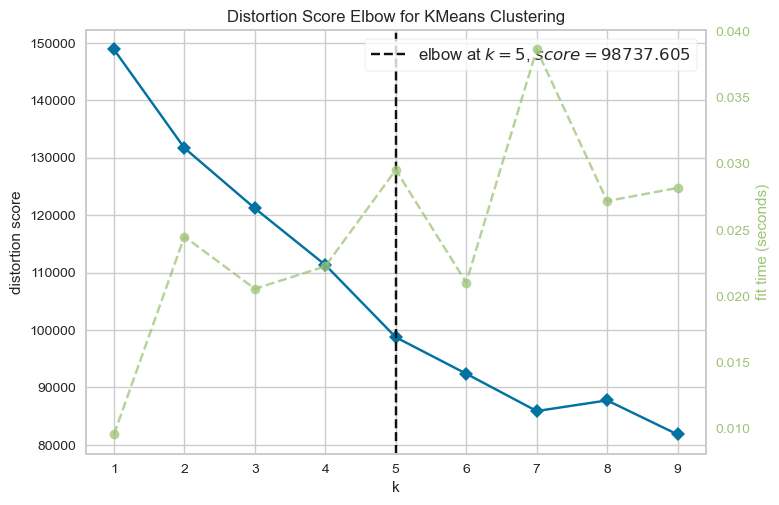

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [144]:
# Inisialisasi model KMeans
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk mencari jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data_for_clustering
visualizer.fit(X_ready_df)

# Menampilkan grafik elbow
visualizer.show()

tidak beda jauh dengan awal namun ada peningkatan dan kita akan tetap menggunakan 4, karena 5 terlalu banyak tidak sesui dengan keputusan bisnis di awal

In [145]:
# Clustering ulang
kmeans_selected = KMeans(n_clusters=4, random_state=0)
kmeans_selected.fit(X_ready_df)

# Label cluster baru
labels_selected = kmeans_selected.labels_

# Hitung Silhouette Score
silhouette_selected = silhouette_score(X_ready_df, labels_selected)

print(f"\nSilhouette Score setelah Feature Selection: {silhouette_selected:.4f}")

# ====== Step 3: Perbandingan ======
print("\n--- Perbandingan ---")
print(f"Silhouette Score sebelum feature selection: {silhouette_avg:.4f}")
print(f"Silhouette Score setelah feature selection: {silhouette_selected:.4f}")


Silhouette Score setelah Feature Selection: 0.1350

--- Perbandingan ---
Silhouette Score sebelum feature selection: 0.1174
Silhouette Score setelah feature selection: 0.1350


ya, hasilnya tidak berbeda jauh, namun ada peningkatan

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

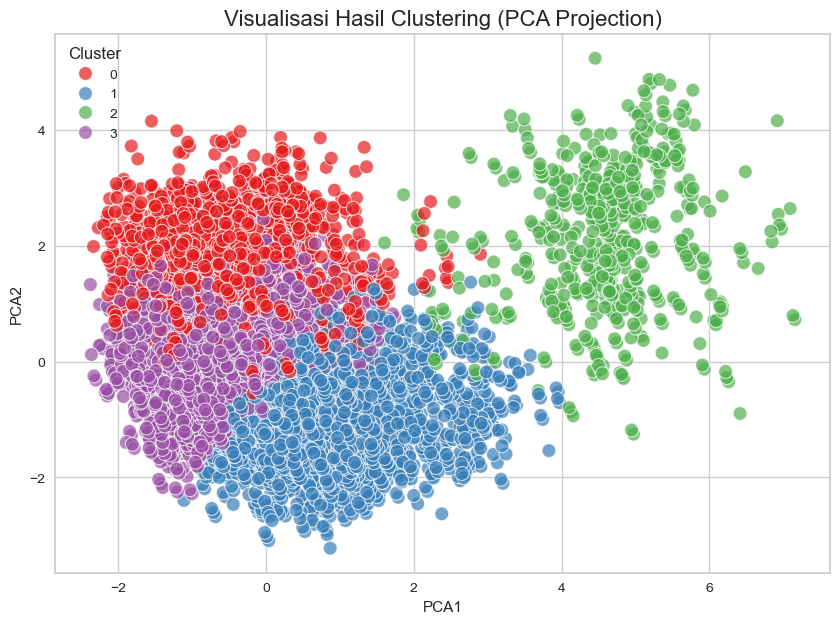

In [146]:
# Lakukan PCA untuk reduksi ke 2 dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_ready_df)

# Buat DataFrame untuk visualisasi
pca_df = pd.DataFrame()
pca_df['PCA1'] = pca_result[:,0]
pca_df['PCA2'] = pca_result[:,1]
pca_df['Cluster'] = labels_selected

# Plot scatter plot
plt.figure(figsize=(10,7))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set1',
    data=pca_df,
    s=100,
    alpha=0.7
)
plt.title('Visualisasi Hasil Clustering (PCA Projection)', fontsize=16)
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [147]:
# Inverse standarization untuk kolom numerik
X_numerical_original = scaler.inverse_transform(X_ready_df[numerical_cols])

# Buat mapping kebalikannya
inverse_mapping = {
    'kondisi_atap': {1: 'Bagus', 0: 'Jelek'},
    'fas_bab': {1: 'Pribadi', 2: 'Bersama', 3: 'Umum', 4: 'Tidak ada'},
    'sta_lahan': {1: 'Milik sendiri', 0: 'Bukan miliki sendiri'},
    'id_partisipasi_sekolah': {0: 'Tidak/belum pernah sekolah', 1: 'Masih sekolah', 2: 'Tidak bersekolah lagi'},
    'sta_bangunan': {1: 'Milik sendiri', 0: 'Bukan miliki sendiri'},
    'kondisi_dinding': {1: 'Bagus', 0: 'Jelek'},
    'ada_lemari_es': {1: 'Ya', 0: 'Tidak'},
    'ada_sepeda': {1: 'Ya', 0: 'Tidak'},
    'ada_motor': {1: 'Ya', 0: 'Tidak'},
    'aset_tak_bergerak': {1: 'Ya', 0: 'Tidak'},
    'sta_art_usaha': {1: 'Ya', 0: 'Tidak'}
}
# Copy dulu biar aman
X_decoded_df = X_ready_df.copy()

# Apply inverse mapping untuk kolom kategorikal
for col, mapping in inverse_mapping.items():
    if col in X_decoded_df.columns:
        X_decoded_df[col] = X_decoded_df[col].map(mapping)



### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [148]:
# Replace kolom numerik yang sudah dibalik
for idx, col in enumerate(numerical_cols):
    X_decoded_df[col] = X_numerical_original[:, idx]



In [149]:
# Tambahkan kolom cluster ke data yang sudah di-inverse (X_decoded_df)
X_decoded_df['Cluster'] = labels_selected


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [150]:
# Statistik numerik per cluster: mean, median, std, min, max
stats_numerik = X_decoded_df.groupby('Cluster')[numerical_cols].agg(['mean', 'median', 'std', 'min', 'max'])

print("\n=== Statistik Numerik per Cluster ===")
print(stats_numerik)


=== Statistik Numerik per Cluster ===
        jml_anggota_keluarga                             luas_lantai         \
                        mean median       std  min   max        mean median   
Cluster                                                                       
0                   2.757856    3.0  1.335728  1.0  15.0  592.141959  540.0   
1                   3.326053    3.0  1.184495  1.0  15.0  122.597950   69.0   
2                   2.904594    3.0  1.283557  1.0   8.0  536.915194  500.0   
3                   3.127509    3.0  1.294727  1.0   8.0  625.778827  600.0   

                                   ...    kloset                             \
                std   min     max  ...      mean median       std  min  max   
Cluster                            ...                                        
0        336.520379   4.0  1600.0  ...  1.027357    1.0  0.196093  1.0  3.0   
1        144.967911   0.0   900.0  ...  1.166481    1.0  0.494878  1.0  3.0   
2        320

In [151]:
# Pilih kolom kategorikal
categorical_cols_for_stat = list(set(X_decoded_df.columns) - set(numerical_cols) - {'Cluster'})

# Statistik kategorikal: modus dan proporsi
print("\n=== Statistik Kategorikal per Cluster ===")

for col in categorical_cols_for_stat:
    print(f"\n--- {col} ---")
    # Modus per cluster
    mode_per_cluster = X_decoded_df.groupby('Cluster')[col].agg(lambda x: x.mode()[0])
    print("Mode per cluster:")
    print(mode_per_cluster)
    
    # Proporsi tiap kategori di dalam masing-masing cluster
    proporsi = X_decoded_df.groupby('Cluster')[col].value_counts(normalize=True).unstack().fillna(0)
    print("\nProporsi kategori per cluster:")
    print(proporsi)


=== Statistik Kategorikal per Cluster ===

--- kondisi_atap ---
Mode per cluster:
Cluster
0    Jelek
1    Jelek
2    Jelek
3    Jelek
Name: kondisi_atap, dtype: object

Proporsi kategori per cluster:
kondisi_atap     Bagus     Jelek
Cluster                         
0             0.232902  0.767098
1             0.275462  0.724538
2             0.219081  0.780919
3             0.387249  0.612751

--- ada_sepeda ---
Mode per cluster:
Cluster
0    Tidak
1    Tidak
2    Tidak
3    Tidak
Name: ada_sepeda, dtype: object

Proporsi kategori per cluster:
ada_sepeda     Tidak        Ya
Cluster                       
0           0.732348  0.267652
1           0.525518  0.474482
2           0.703180  0.296820
3           0.727470  0.272530

--- aset_tak_bergerak ---
Mode per cluster:
Cluster
0    Tidak
1       Ya
2    Tidak
3    Tidak
Name: aset_tak_bergerak, dtype: object

Proporsi kategori per cluster:
aset_tak_bergerak     Tidak        Ya
Cluster                              
0                

Tulis hasil interpretasinya di sini.
1. Cluster 1: Membutuhkan Bantuan Gol II
2. Cluster 2: Membutuhkan Bantuan Gol I
3. Cluster 3: Sangat Membutuhkan bANTUAN
4. Cluster 4: Belum Membutuhkan Bantuan

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- Jml anggota keluarga: Mean 2.76, median 3.0, keluarga kecil, tekanan ekonomi rendah.
- Luas lantai: Mean 592.14 m², median 540 m², rumah sangat luas.
- Kloset: Mean 1.03, median 1.0 (ada kloset), sanitasi sangat baik.
- Buang tinja: Mean 1.18, median 1.0 (septik tank), sanitasi sangat baik.
- Kondisi dinding: 72.94% jelek, 27.06% bagus, kondisi rumah buruk.
- Kondisi atap: 76.71% jelek, 23.29% bagus, buruk.
- Fas BAB: 82.77% pribadi, 0.18% tidak ada, sanitasi baik.
- Sta bangunan: 89.72% milik sendiri, stabil.
- Sta lahan: 84.25% milik sendiri, cukup stabil.
- Aset:
    - Sepeda: 73.23% tidak punya.
    - Motor: 69.28% tidak punya.
    - Lemari es: 80.67% tidak punya.
    - Aset tak bergerak: 81.22% tidak punya, aset sangat minim.
- Sta art usaha: 28.43% ya, potensi usaha sedang.
- Partisipasi sekolah: 71.20% tidak bersekolah lagi, 25.10% masih sekolah, 3.70% tidak pernah sekolah, cukup baik.
- **Analisis:** Rumah sangat luas, sanitasi sangat baik (kloset, buang tinja, fas BAB), kepemilikan bangunan/lahan tinggi, tetapi kondisi rumah jelek (dinding, atap) dan aset sangat minim. Ini menunjukkan kelompok dengan stabilitas fisik tetapi kekurangan aset dan kualitas rumah.

## Cluster 2:
- Jml anggota keluarga: Mean 3.33, median 3.0, keluarga sedang.
- Luas lantai: Mean 122.60 m², median 69 m², rumah sangat kecil.
- Kloset: Mean 1.17, median 1.0 (ada kloset), sanitasi baik.
- Buang tinja: Mean 2.24, median 2.0 (kebun/sawah), sanitasi buruk.
- Kondisi dinding: 68.35% jelek, 31.65% bagus, cukup buruk.
- Kondisi atap: 72.45% jelek, 27.55% bagus, buruk.
- Fas BAB: 82.33% pribadi, 0.09% tidak ada, sanitasi baik.
- Sta bangunan: 65.10% milik sendiri, kurang stabil.
- Sta lahan: 58.77% milik sendiri, tidak stabil.
Aset:
    - Sepeda: 52.55% tidak punya.
    - Motor: 88.57% tidak punya.
    - Lemari es: 38.27% tidak punya, 61.73% punya.
    - Aset tak bergerak: 86.98% punya, aset cukup baik.
- Sta art usaha: 9.90% ya, potensi usaha sangat rendah.
- Partisipasi sekolah: 59.73% tidak bersekolah lagi, 31.31% masih sekolah, 8.96% tidak pernah sekolah, pendidikan rendah.
- **Analisis:** Rumah sangat kecil, sanitasi buruk (buang tinja), kepemilikan bangunan/lahan rendah, kondisi rumah jelek, tetapi memiliki aset (lemari es, aset tak bergerak). Ini menunjukkan kelompok dengan aset tetapi hidup dalam kondisi fisik buruk dan tidak stabil.

## Cluster 3:
- Jml anggota keluarga: Mean 2.90, median 3.0, keluarga kecil.
- Luas lantai: Mean 536.92 m², median 500 m², rumah luas.
- Kloset: Mean 3.80, median 4.0 (tanpa kloset), sanitasi sangat buruk.
- Buang tinja: Mean 4.07, median 4.0 (sungai/laut), sanitasi sangat buruk.
- Kondisi dinding: 79.86% jelek, 20.14% bagus, sangat buruk.
- Kondisi atap: 78.09% jelek, 21.91% bagus, sangat buruk.
- Fas BAB: 80.04% tidak ada, hanya 4.59% pribadi, sanitasi sangat buruk.
- Sta bangunan: 81.80% milik sendiri, cukup stabil.
- Sta lahan: 78.09% milik sendiri, cukup stabil.
- Aset:
    - Sepeda: 70.32% tidak punya.
    - Motor: 69.08% tidak punya.
    - Lemari es: 84.10% tidak punya.
    - Aset tak bergerak: 74.74% tidak punya, aset sangat minim.
- Sta art usaha: 20.32% ya, potensi usaha rendah.
- Partisipasi sekolah: 67.14% tidak bersekolah lagi, 29.68% masih sekolah, 3.18% tidak pernah sekolah, cukup baik.
- **Analisis:** Rumah luas, kepemilikan bangunan/lahan cukup stabil, tetapi sanitasi sangat buruk (tanpa kloset, buang tinja ke sungai, 80% tanpa fas BAB), kondisi rumah sangat jelek, dan aset sangat minim. Ini menunjukkan kelompok dengan stabilitas kepemilikan tetapi sangat miskin dalam sanitasi dan aset.

## Cluster 4:
- Jml anggota keluarga: Mean 3.13, median 3.0, keluarga sedang.
- Luas lantai: Mean 625.78 m², median 600 m², rumah sangat luas.
- Kloset: Mean 1.03, median 1.0 (ada kloset), sanitasi sangat baik.
- Buang tinja: Mean 1.13, median 1.0 (septik tank), sanitasi sangat baik.
- Kondisi dinding: 58.28% jelek, 41.72% bagus, lebih baik dari cluster lain.
- Kondisi atap: 61.28% jelek, 38.72% bagus, lebih baik.
- Fas BAB: 89.14% pribadi, 0% tidak ada, sanitasi sangat baik.
- Sta bangunan: 87.52% milik sendiri, stabil.
- Sta lahan: 79.83% milik sendiri, cukup stabil.
- Aset:
    - Sepeda: 72.75% tidak punya.
    - Motor: 86.89% tidak punya.
    - Lemari es: 57.50% tidak punya, 42.50% punya.
    - Aset tak bergerak: 76.09% tidak punya, aset minim.
- Sta art usaha: 33.94% ya, potensi usaha tertinggi.
- Partisipasi sekolah: 64.70% tidak bersekolah lagi, 33.23% masih sekolah, 2.07% tidak pernah sekolah, terbaik.

- **Analisis:** Rumah sangat luas, sanitasi sangat baik, kepemilikan bangunan/lahan stabil, kondisi rumah lebih baik (41.72% dinding bagus, 38.72% atap bagus), potensi usaha tinggi, tetapi aset masih minim (kecuali lemari es). Ini menunjukkan kelompok dengan kondisi fisik dan sanitasi baik tetapi terbatas pada aset.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [152]:
# Membulatkan semua kolom numerik ke 2 angka di belakang koma
X_decoded_df[numerical_cols] = X_decoded_df[numerical_cols].round(2)

In [153]:
# Mengekspor final_data ke file CSV
X_decoded_df.to_csv('hasil_clustering_final.csv', index=False)

print("Data berhasil diekspor ke hasil_clustering_final.csv")


Data berhasil diekspor ke hasil_clustering_final.csv
